# **Beyond the Surface**
#### *Machine Learning for Predicting Well Status in Tanzania*

## **Business Understanding**
### **Background**
In a nation where one third of the country is arid to semi-arid, access to basic water has been a constant challenge over many years. From around the 90s to early 2000s, Tanzania's water supply and sanitation was characterised by decreasing access to at least basic water sources especially in urban areas, steady access to some form of sanitation, intermittent water supply and generally low quality of service.

Other than the three major lakes in the region, ground water has been the major source of water for the nation's people. In 2006, the Government of Tanzania adopted a National Water Sector Development Strategy that aimed to promote integrated water resources management and the development of urban and rural water supply. Since it's adoption, Tanzania has made significant progress improving the access of thousands of citizens.

Despite efforts by the Tanzanian Government to deal with this issue, it has proved to be difficult mainly due to lack of resources. According to the [Tanzania_Economic_Update_2023](https://www.worldbank.org/en/country/tanzania/publication/tanzania-economic-update-universal-access-to-water-and-sanitation-could-transform-social-and-economic-development) by World Bank Group, only 61% of households in Tanzania currently have access to a basic water-supply, a great improvement from the 2000s but there's still room for improvement.

When it comes to resources, the Tanzanian water sector remains heavily dependent on external donors with 88% of the available funds being provided by external donor organisations. However, results have been mixed. For example, a report by GIZ notes that "despite heavy investments brought in by the World Bank and the European Union, the utility serving Dar es Salaam has remained one of the worst performing water entities in Tanzania." this is cited on [WikiPedia](https://en.wikipedia.org/wiki/Water_supply_and_sanitation_in_Tanzania).

### **Project Overview**
The Government of Tanzania is constantly trying to increase the percentage of the water access in the country, however, this percentage is constantly being dragged downwards due to lack of well routine maintenance or follow-ups. 

The goal of this project is to:
- Investigate why the percentage of households that have access to basic water is slightly above 50%, despite the National Water Sector Development Strategy being at work for almost 2 decades.

- Leverage machine learning to help the Government keep track of the functionality status of the wells across the country, whether functional, needs repair or non-functional.

- Provide recommendations to help the Tanzanian Government accelerate their National Water Sector Development Strategy.

### **Project Objectives**
This project seeks to:
- Develop a machine learning model that predicts whether a well is:
    - *Functional*

    - *Non-functional*

    - *Functional but needs repair*

- Achieve a target classification accuracy of **at least 85%** and an F1-score of **at least 85%**.

- Identify key features (e.g., what kind of pump is operating, when it was installed, how it is managed) that drive well functionality.

- Support national water development by identifying underperforming or non-functional wells using data science tools.

- Develop a blueprint system that can be adapted for similar water access initiatives globally.

### **Stakeholders**
- *The Tanzanian Government*: By predicting which wells are functional, non functional or need repairs, the government can have a clear idea of where resources are needed the most and help them drive their Water Development Strategy even further and improve the country's water situation. 

- *External Donors*: These are individuals or institutions who provide resources to help the nation.

- *Non-Profit Organizations*: These are organizations looking to help.

- *Local Communities*: These are the people the wells help directly. 

### **In Scope**
- Exploratory Data Analysis (EDA) to understand key trends and relationships in the dataset.

- Data preprocessing: handling missing values, encoding categorical variables, and scaling numerical ones.

- Feature engineering: including interaction terms, and domain-specific transformations.

- Model development using classification algorithms: **Logistic Regression, Decision Trees, Random Forests**

- Model evaluation using accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC.

- Model validation using k-fold cross-validation and hyperparameter tuning (GridSearchCV).

## **Data Understanding**
This section contains the data's initial exploration. It provides information about the source of the data, helps have a peek at the dataset to understand it's structure such as its shape, data types, etc. and also understand what kind of mess the data has, such as missing values, duplicated records, outliers, among other data integrity issues.

### **Data Source**
This project required a dataset that represents Tanzania's water systems updated and created by people who manage the said systems.

The data used in this project was sourced from [DrivenData's Tanzania Water Pumps competition](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/). Who in turn sourced it from Taarifa, an open source platform that aggregates data from the Tanzania Ministry of Water and the Tanzanian Ministry of Water.

#### *Why is this dataset important to the project?*
- A dataset sourced from the country of interest is crucial as it provides accurate and relevant information specific to the project's context, leading to more reliable results, better insights, and more effective solutions.

- It allows for a deeper understanding of local nuances and avoids the pitfalls of applying generalized data from other regions.

- For machine learning projects such as this, using real-world data from the target country leads to more accurate predictions and better model performance.

- Using inappropriate data can lead to unintended consequences and ineffective interventions.

### **Mini Exploration**
In this section we are importing the necessary packages, loading the dataset and exploring the dataset lightly, checking its:
- shape

- data types

- data integrity issues

#### *Importing packages and loading datasets*

In [150]:
# import packages
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

This repository contains 3 datasets, the `Training_Set_Values.csv`, which contains the features/predictors, the `Training_Set_Labels.csv`, which contains the target variables and the `Test_Set_Values`, that contains the test values for testing for generalization.

In the next cell we are only loading the 2 train datasets as `X` and `y`.

In [151]:
# Load the datasets.
# The predictors.
X = pd.read_csv('../Data/Raw_Data/Training_Set_Values.csv')

# The target variable.
y_training = pd.read_csv('../Data/Raw_Data/Training_Set_Labels.csv')

In [152]:
# Preview predicting features.
print('Predictors')
X.head()

Predictors


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [153]:
# Preview target variables.
print('Target Variables')
y_training.head()

Target Variables


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


#### *Data Summary: shapes, data types*
This section checks the dataset's shape and data types, this is important as it will help in identifying if the data is sufficient for modeling or not. We'll also know what kind of data we will be working with.

- We are using the `.shape()` method to check the dataset's shape.

In [154]:
# Shape of the dataset
print("Rows, Columns:", X.shape)

Rows, Columns: (59400, 40)


The dataset contains 59400 rows and 40 columns, giving us enough records to predict wells functionalities across Tanzania.

- We are using the `.info()` method to retrieve a concise summary of the data.

In [155]:
# Data types and non-null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The dataset contains data stored in 3 data types, namely:

| Data Type | No. of columns |
| :------------:| :----------: |
| Object | 30 |
| Integer | 7 |
| Float | 3 |

So far, the only column whose values have been stored in an inaccurate data type is `date_recorded`.

#### *Checking Data Integrity Issues*
In this section we are looking to identify whether the data contains:
- Missing values

- Duplicated records

- Outliers

In [156]:
# Find total number and percentage of missing values.
# Retrieve sum of missing values.
missing = X.isnull().sum()

# Turn into percentage.
missing_percent = (missing / len(X)) * 100

# Store in a DataFrame.
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})

# Filter out columns that don't have missing values.
missing_df[missing_df['Missing Values'] > 0]

,Missing Values,Percent
funder,3635,6.119529
installer,3655,6.153199
subvillage,371,0.624579
public_meeting,3334,5.612795
scheme_management,3877,6.526936
scheme_name,28166,47.417508
permit,3056,5.144781


The dataset has a lot of missing data, especially in the `scheme_name` column, and moderately low missing values in the other 6 columns.

In [157]:
# Find duplicate records.
duplicate_records = X.duplicated().sum()

print(f'The training dataset contains {duplicate_records} duplicate records')

The training dataset contains 0 duplicate records


The dataset has no duplicated records.

In the next cell we are creating a figure of boxplots to identify potential outliers in the dataset, they are generated for each numerical feature. Boxplots are effective visual tools for detecting values that deviate significantly from the central tendency of the data.

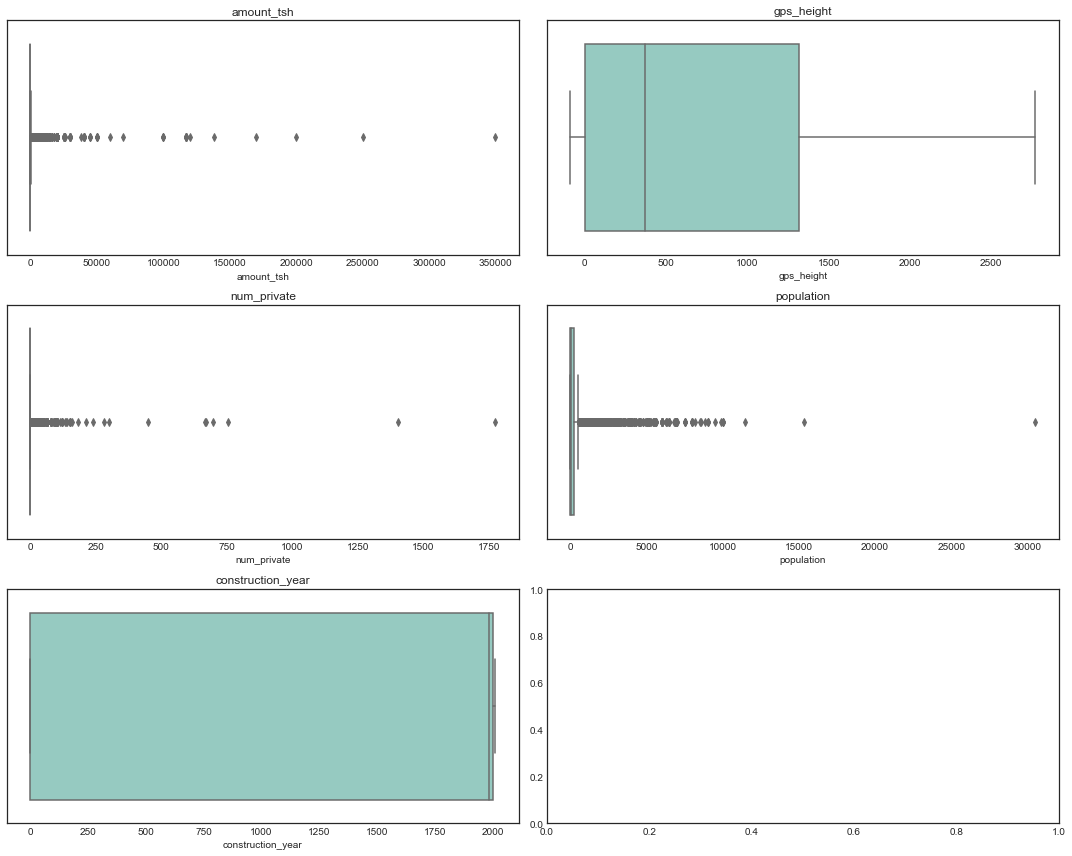

In [158]:
# Extract numerical columns
numerical_columns = X.select_dtypes(include='number').columns.tolist()

# Optional: Drop specific columns
cols_to_drop = ['id', 'longitude', 'latitude', 'region_code', 'district_code']
numerical_columns = [col for col in numerical_columns if col not in cols_to_drop]

# Number of plots needed
n = len(numerical_columns)
cols = 2  # Number of columns in subplot grid
rows = math.ceil(n / cols)  # Number of rows based on total plots

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4), sharey=False)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=X[col], ax=axes[i])
    axes[i].set_title(col)

fig.tight_layout()
plt.show()


From the boxplots above we identify that several features display noticeable outliers, particularly in columns like `amount_tsh`, `population`, and `gps_height`. These outliers may represent wells with unusual characteristics (e.g., extremely high water amounts or serving disproportionately large populations).

However it is important to note that not all outliers are necessarily bad data. In this context, they may represent wells in densely populated areas or regions with extreme topography. However, their presence could skew model performance if not handled appropriately.

A deeper dive will be conducted into specific variables with extreme values to assess whether these outliers reflect genuine variance in the data or data quality issues. This step will guide the final preprocessing decisions for modeling

- Next, we are using `.nunique()` method to check for unique values in every column.

In [159]:
# Check unique values for each column (useful for categorical vars)
X.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

More than half of the columns in the dataset contain a lot of unique values, this does not mean that they are bad data, in the next section, we will look into it further to understand what we are dealing with better.

#### *Descriptive Analysis*
We are using the `.describe()` method to generate a summary description of the data.

In [160]:
# Summary stats for numerical columns
X.describe()


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


From the statistical summary above, we confirm our boxplots' display that most of our numerical columns contain outliers. Some of the examples are:
- The `amount_tsh` column has a mean of 317.65 and a 75 percentile of 20, while its maximum value is 350,000.

- The `gps_height` column has a mean and a 75th percentile of 668.3 and 1319.25 respectfully, while its maximum value stands at 2770, almost three times the mean.

- The `num_private` column has a mean of 0.47, but a maximum value of 1776.

- The `population` column has a maximum population of 30,500 and a mean of 179.


### **Summary**
#### *Structure*
The dataset contains structured data stored in 59,400 rows and 40 columns, with records in 30 columns stored as objects, in 7 columns stored as integers and the other 3 columns contain records stored as floats.

The `y` dataset contains categorical data stored in one column and 59,400 rows.

#### *Data Issues and the Next Steps*
| Found                 |    Action                                                          |
| --------------------- | ------------------------------------------------------------------ |
| Missing values        | replace or drop                                                    |
| Wrong data types      | Convert using `pd.to_datetime`, `astype()`                         |
| Skewed distributions  | Use log/sqrt transforms                                            |
| Categorical issues    | Fix inconsistent labels (If any)                                   |

## **Data Cleaning**
In this section we are cleaning the dataset to prepare it for modeling. In the previous section, we performed the initial data exploration which not only helped in understanding the dataset but also pointing out some of the issues that could otherwise mislead the project's findings.

This is a crucial step for any project before training a machine learning model because it ensures the data is accurate, consistent, and relevant, leading to better model performance and more reliable predictions. Cleaning data helps remove errors, inconsistencies, and irrelevant information that can negatively impact the model's ability to learn and generalize.

This session will involve:
- Dealing with missing values

- Converting records to their correct data types

- Dealing with categorical issues

- Identifying relevant columns based on domain knowledge

### **Missing Values**
During the data understanding, we found that 7 columns contain missing values, in this section, we are exploring the columns further to make sure there is no underlying reason other than the fact that the columns are incomplete.

This step is crucial as missing values in datasets can significantly impact the accuracy and reliability of analyses and machine learning models. Addressing ensures valid results and avoids introducing bias.

The columns with missing values include: `funder`, `installer`, `subvillage`, `public_meeting`, `scheme_management`, `scheme_name`, `permit`.

#### *Exploring the columns*
The first step is visually scoping the columns to understand them better. We are filtering them out and storing them in a separate variable to enable easy access as examining them in a crowd of 40 columns would prove to be difficult.

In [161]:
# Filter the columns with the missing values to examine them closely.
missing_vals = X[['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']]

# Preview the columns
missing_vals

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


By visually scoping the columns, we notice that:
- All are stored as objects.

- `funder` and `installer` columns have some similarities, in the interest of the project, we are going to keep both.

In the next cell, we are exploring the columns that contain boolean valeus further, especially `public_meeting` column as it is not clear if it has any other value other than 'True'.

In [162]:
missing_vals['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

#### *Dealing with the missing values*
In this next session we are replacing the missing values with either the column's `mode`, `unknown` or `other` uning the `,fillna()` method, depending on the context of the column.

But as for the `scheme_name` column, we are dropping it as it contains null values in almost half of the records in the dataset. Keeping it would add noise to the dataset.

In [163]:
# Fill missing values with mode.
fill_mode = ['public_meeting', 'permit']

for x in fill_mode:
    X[x] = X[x].fillna(X[x].mode()[0])

# Fill missing values with 'other'
fill_other = ['funder', 'installer', 'scheme_management']

for y in fill_other:
    X[y] = X[y].fillna('other')

# Fill missing values using 'unknown'
X['subvillage'] = X['subvillage'].fillna('unknown')

# Drop scheme_name and id (to have one index)
X.drop(columns= ['scheme_name', 'id'], inplace= True)

In [164]:
# Confirm there's no missing records.
X.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

We have filled all the missing values in the dataset and dropped the ones we could not fill.

### **Data Conversion**
In the previous section we found that one of the column had records stored as objects despite them being dates. Here we are converting this column to datetime using the `pd.to_datetime()` method. It is important to convert them beck to their correct data types so as to ensure data compatibility, usability, and accuracy across different systems and applications.

The column is: `date_recorded`

In [165]:
# Convert object columns to datetime.
columns = ['date_recorded']

# Loop through the columns.
for col in columns:
    X[col] = pd.to_datetime(X[col])

In [166]:
# Verify the change.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   amount_tsh             59400 non-null  float64       
 1   date_recorded          59400 non-null  datetime64[ns]
 2   funder                 59400 non-null  object        
 3   gps_height             59400 non-null  int64         
 4   installer              59400 non-null  object        
 5   longitude              59400 non-null  float64       
 6   latitude               59400 non-null  float64       
 7   wpt_name               59400 non-null  object        
 8   num_private            59400 non-null  int64         
 9   basin                  59400 non-null  object        
 10  subvillage             59400 non-null  object        
 11  region                 59400 non-null  object        
 12  region_code            59400 non-null  int64         
 13  d

After the dealing with the missing values and converting the columns to their rightful data types, the dataset now contains:

| Data Type | Columns |
|-----------| -------- |
|Object     | 26       |
|Integer    | 7        |
|Float      | 3        |
|Bool       | 2        |
|Datetime64 | 1        |

Bringing the total columns to 39.

### **Standardization**
In this section we are standardizing all the categorical columns by turning them all to lower case, correcting alternate spellings and fixing typos (if any). This is crucial because otherwise we would treat them as separate categories.

We are reviewing columns content before standarzing them.

In [167]:
# View the most occuring records in categorical columns
for col in X.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    print(X[col].value_counts(dropna=False).head(15))  # show top 15 values


--- FUNDER ---
Government Of Tanzania    9084
other                     3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Name: funder, dtype: int64

--- INSTALLER ---
DWE                   17402
other                  3655
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
Name: installer, dtype: int64

--- WPT_NAME ---
none 

Next, we are standardizing the columns by creating a function that:
- converts all text to lowerecase

- strips whitespace

- replaces multiple spaces with one

In [168]:
# Create standardization function.
def clean_categorical_columns(df, show_value_counts=False, top_n=10):
    """
    Standardizes text in all object columns:
    - Converts to lowercase
    - Strips whitespace
    - Replaces multiple spaces with one

    Parameters:
    - df: your dataframe
    - show_value_counts: if True, prints value counts per column
    - top_n: how many top values to show if show_value_counts is True

    Returns:
    - cleaned dataframe
    """
    df_cleaned = df.copy()
    cat_cols = df_cleaned.select_dtypes(include='object').columns

    for col in cat_cols:
        df_cleaned[col] = (
            df_cleaned[col]
            .astype(str)
            .str.lower()
            .str.strip()
            .str.replace(r'\s+', ' ', regex=True)
        )
        if show_value_counts:
            print(f"\n--- {col.upper()} ---")
            print(df_cleaned[col].value_counts(dropna=False).head(top_n))
    
    return df_cleaned

X_cleaned = clean_categorical_columns(X, show_value_counts=True)


--- FUNDER ---
government of tanzania    9084
other                     3635
danida                    3114
hesawa                    2202
rwssp                     1374
world bank                1349
kkkt                      1287
world vision              1246
unicef                    1057
tasaf                      877
Name: funder, dtype: int64

--- INSTALLER ---
dwe                 17405
other                3655
government           1891
hesawa               1395
rwe                  1206
commu                1065
danida               1050
district council      965
kkkt                  910
0                     777
Name: installer, dtype: int64

--- WPT_NAME ---
none               3565
shuleni            1748
zahanati            830
msikitini           535
kanisani            323
bombani             271
sokoni              260
ofisini             254
school              208
shule ya msingi     199
Name: wpt_name, dtype: int64

--- BASIN ---
lake victoria              10248
pan

Despite making the text changes to the categorical columns, columns such as `founder`, `installer` still have a very high number of unique values, in the next code we are going to examine the unique values to check if they are the same, but just have different spellings.

In [169]:
# Loop through all categorical columns, display unique values and their number
for col in X_cleaned.select_dtypes(include='object').columns:
    unique_vals = sorted(X_cleaned[col].dropna().unique())
    print(f"\n--- {col.upper()} ({len(unique_vals)} unique) ---")
    print(unique_vals)


--- FUNDER (1898 unique) ---
['0', 'a/co germany', 'aar', 'abas ka', 'abasia', 'abc-ihushi development cent', 'abd', 'abdala', 'abddwe', 'abdul', 'abood', 'abs', 'aco/germany', 'acord', 'acord ngo', 'acra', 'act', 'act mara', 'action aid', 'action contre la faim', 'action in a', 'adap', 'adb', 'adf', 'adp', 'adp bungu', 'adp mombo', 'adp/w', 'adra', 'af', 'afdp', 'afric', 'africa', 'africa 2000 network/undp', 'africa amini alama', 'africa project ev germany', 'african', 'african 2000 network', 'african barrick gold', 'african development bank', 'african development foundation', 'african muslim agency', 'african realief committe of ku', 'african reflections foundation', 'african relie', 'africaone ltd', 'africare', 'afriican reli', 'afroz ismail', 'afya department lindi rural', 'agape churc', 'agt church', 'ahmadia', 'ai', 'aic', 'aic church', 'aic kij', 'aict', 'aimgold', 'aixos', 'alia', 'ambwene mwaikek', 'amref', 'amrefe', 'anglican church', 'angrikana', 'anjuman e seifee', 'answee

The rest of the columns seem to be okay, except the two mentioned earlier. To deal with them we are going to put all the rare ones into `others` because sorting all of them would be time consuming.

*Note: we cannot go through all the 1000+ records just to pick out the misspelled ones.*

In the next cell we are grouping all the rare categories into a single category like 'others'.

In [170]:
# Create a function that groups rare categories into a single category.
def group_rare_labels(series, min_freq=100):
    # First, lowercase everything
    series = series.astype(str).str.lower()

    freq = series.value_counts()
    return series.apply(lambda x: x if freq[x] >= min_freq else 'other')

X_cleaned['funder'] = group_rare_labels(X_cleaned['funder'], min_freq=100)
X_cleaned['installer'] = group_rare_labels(X_cleaned['installer'], min_freq=100)


In [171]:
# Preview the changes.
for col in X_cleaned.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    print(X_cleaned[col].value_counts(dropna=False).head(15))  # show top 15 values


--- FUNDER ---
other                     16014
government of tanzania     9084
danida                     3114
hesawa                     2202
rwssp                      1374
world bank                 1349
kkkt                       1287
world vision               1246
unicef                     1057
tasaf                       877
district council            843
dhv                         829
private individual          826
dwsp                        811
0                           777
Name: funder, dtype: int64

--- INSTALLER ---
dwe                   17405
other                 15668
government             1891
hesawa                 1395
rwe                    1206
commu                  1065
danida                 1050
district council        965
kkkt                    910
0                       777
central government      763
tcrs                    707
world vision            699
danid                   624
ces                     610
Name: installer, dtype: int64

--- WPT

From the code above, we notice that the two columns have some columns with '0' as the value, this could mean that the data collectors used it to mean unknown. In the next cell we are replacing `0` with `unknown`. 

In [172]:
# Replace 0 with unknown.
columns_to_fix = ['funder', 'installer']

for col in columns_to_fix:
    X[col] = X[col].replace('0', 'unknown')

In [173]:
# Preview the changes.
X_cleaned.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,2011-03-14,roman,1390,other,34.938093,-9.856322,none,0,lake nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,0.0,2013-03-06,other,1399,other,34.698766,-2.147466,zahanati,0,lake victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.0,2013-02-25,other,686,world vision,37.460664,-3.821329,kwa mahundi,0,pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.0,2013-01-28,unicef,263,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,ruvuma / southern coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,0.0,2011-07-13,other,0,artisan,31.130847,-1.825359,shuleni,0,lake victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [174]:
# Save cleaned data to a new file
X_cleaned.to_csv('../Data/Cleaned_Data/Cleaned_Training_Values.csv', index= False)

### **Cleaning the `y_training` DataFrame**
As we are heading to EDA, it is important to clean this dataset and encode it's values in preparation to plotting and modeling.

This involves:
- Dropping the `id` column

- Standardizing

- Encoding the `status_group` column

In [175]:
y_training.value_counts()

id     status_group           
74247  non functional             1
24713  functional                 1
24727  functional                 1
24726  functional                 1
24725  functional                 1
                                 ..
49474  functional needs repair    1
49473  functional                 1
49471  functional needs repair    1
49469  non functional             1
0      non functional             1
Length: 59400, dtype: int64

In [176]:
# Drop id column
y_training.drop(columns= ['id'], inplace= True)

# Standardizing
y_cleaned = clean_categorical_columns(y_training, show_value_counts=True)


--- STATUS_GROUP ---
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


In [177]:
# Ordinal Encode the status_group column
# We are using this type of encoder because then we can decide what category goes to what label.
target_var = y_cleaned.copy()

status = [['non functional', 'functional', 'functional needs repair']]

ode = OrdinalEncoder(categories= status)
y_encoded = pd.DataFrame(ode.fit_transform(y_cleaned[['status_group']]).ravel(), columns= ['status_group'])

y_encoded = y_encoded.astype('int')
y_encoded.head()

,status_group
0,1
1,1
2,1
3,0
4,1


### **Conclusion**
This marks the end of the **Data Cleaning** section. This section involved:
- filling up missing values with `mode`, `unknown`, and `other`.

- converting 2 columns from object to datetime.

- standardizing all categorical data by converting them to lowercase, striping all whitespaces and adding rare categories to a single category, `other`.

## **Exploratory Data Analysis (EDA)**
In this section we are performing Exploratory Data Analysis (EDA) in order to understand the data's characteristics, identify potential issues, and guide subsequent steps in data analysis and modeling. 

Here we are looking at:
- distribution in numerical columns

- count of records in some categorical columns

- relationship between target and selected predictors

- correlation

### **Plotting Numerical Distributions**
Earlier we noticed that most of the numerical columns contain ourtliers, here we will be visualizaing their distributions. To avoid a lot of repetition, we are using Object Oriented Programming to visualize the numerical columns.

#### *The Plotting Code*

In [178]:
# Create a numerical distribution class
class EDA:
    plt.style.use('seaborn-darkgrid') # -> Set the plot style.
    '''This class returns a histogram displaying the specified column's distribution.'''

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def distribution(self, series): # -> Plot numerical distribution.
        self.series = series
        plt.figure(figsize=self.figsize)
        sns.histplot(self.data[self.series], bins=30, kde=True, color='teal')
        plt.title(f'{self.series} Distribution')
        plt.xlabel(self.series)
        return plt.show()

#### *The Amount Distribution*

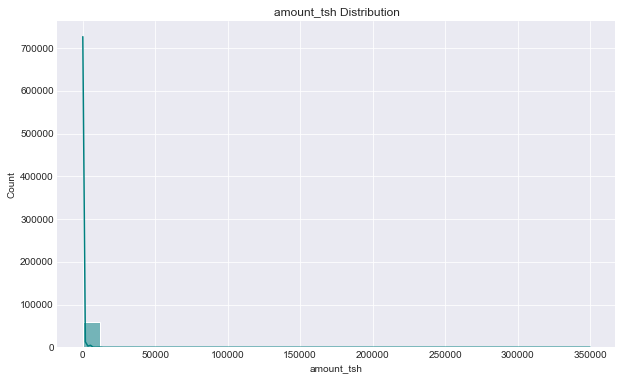

In [179]:
# Instantiate numerical distribution class.
plot = EDA(X_cleaned)

# Plot amount distribution
plot.distribution('amount_tsh')

The amount column is skewed, with most of the amount ranging from 0 to around 10,000 tsh. The skew is mostly caused by the 350,000.

#### *The gps_height Distribution*

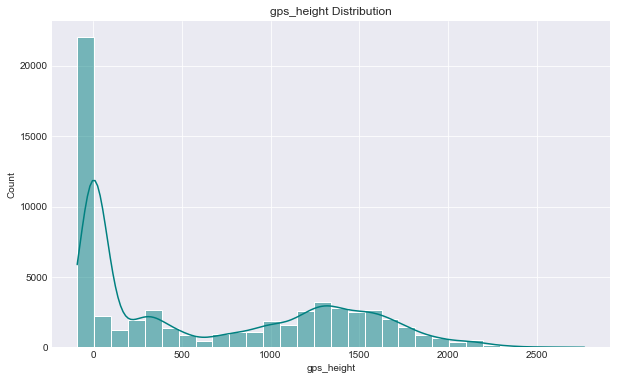

In [180]:
# Plot gps_height distribution
plot.distribution('gps_height')

The `gps_height` distribution is also skewed, this could be attributable to the fact that a lot of the records are `0`, which is impossible since a well's altitude cannot be zero. Zero means there is no well to begin with.

#### *The construction_year Distribution*

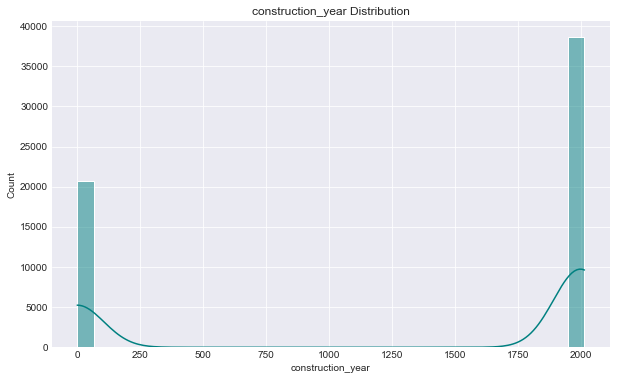

In [181]:
# Plot construction year distribution
plot.distribution('construction_year')

The column has about 20,000 records that do not have known construction years.

#### *The num_private Distribution*

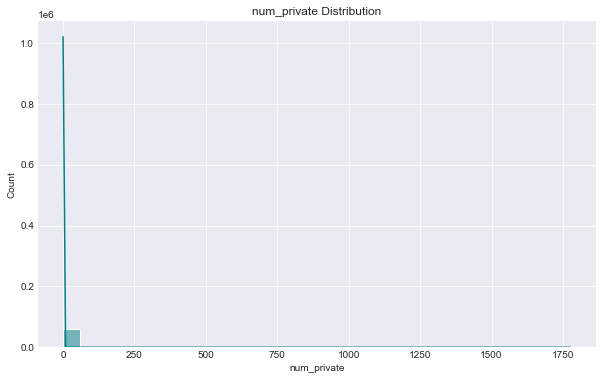

In [182]:
# Plot num_private distribution
plot.distribution('num_private')

The `num_private` column is also skewed**

#### *Summary*
All of the numerical columns have outliers that cause the distribution to skew. During the prepation section, the numerical columns will be standardized to remove the effect of outliers in the distributions.

### **Count of Records in Selected Categorical Columns**
In data preparation, we will need to encode categorical data, this section is to help us understand the cardinality of the categorical data and help us choose what kind of encoding we will be doing in later sections.

For this, we are using: `funder`, `installer`, `payment_type`, `water_quality`, `quantity`, `source`, `management`, `extraction_type`, `basin`.

Also, we will use OOP to avoid repetition.

#### *The countplot Plot*

In [183]:
# Create a categorical column count class
class Cat_EDA:
    plt.style.use('seaborn-darkgrid') # -> Set the plot style.
    '''This class takes in a dataset, and by adding a column name in the object, it returns 
    a count plot of the column.'''

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def count(self, series): # -> Plot categorical counts.
        self.series = series
        plt.figure(figsize=self.figsize)
        sns.countplot(data= self.data, x= self.series, color= 'teal')
        plt.title(f'{self.series} Count')
        plt.xlabel(self.series)
        return plt.show()

#### *Funder Count*

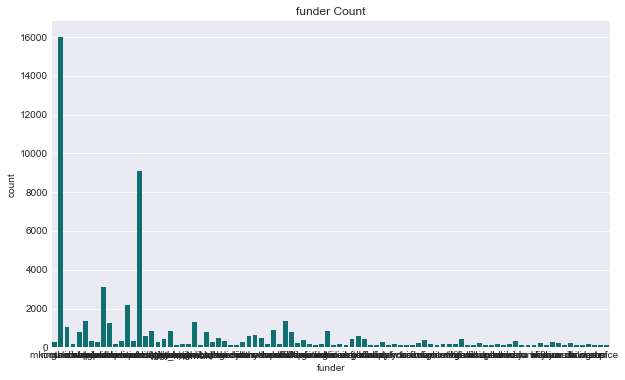

In [184]:
# Instantiate categorical column count class.
plot = Cat_EDA(X_cleaned)

# Plot funder count
plot.count('funder')

The `funder` column contains more than maybe 200 unique records, making it not suitable for OneHotEncoding.

#### *Installer Count*

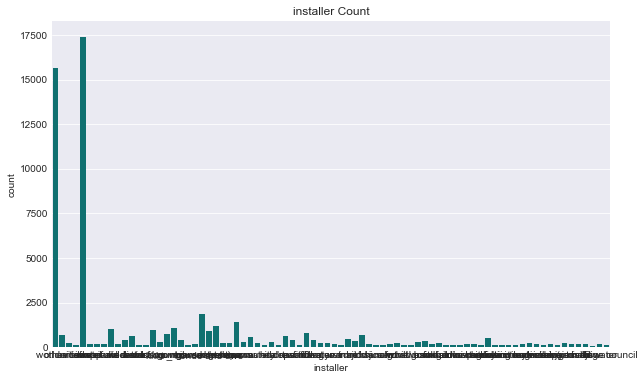

In [185]:
# Plot installer count
plot.count('installer')

The `installer` column also contains a lot of unique values, not suitable for OneHotEncoding.

#### *Payment_type Count*

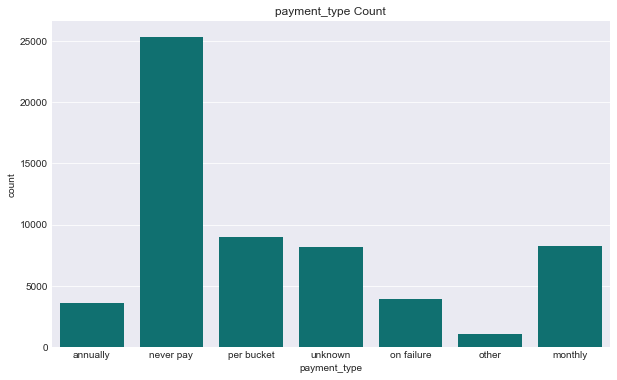

In [186]:
# Plot payment_type count
plot.count('payment_type')

The `payment_type` column contains a good size of unique records, making it eligible for OneHotEncoding.

Also, in other news, most of the wells in Tanzania are totally free to use, while citizens around 20,000 wells either pay per bucket, per month or unknown payment methods.

#### *Water_quality Count*

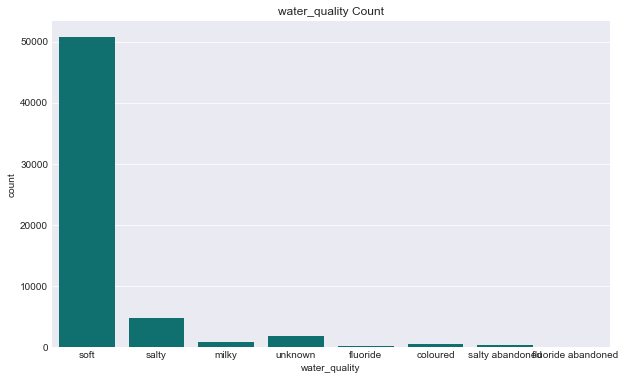

In [187]:
# Plot quality count
plot.count('water_quality')

About 80% of the water from the wells is soft water, with some of them being salty, milky, coloured or unknown

This column could be encoded using OneHotEncoder.

#### *Water Quantity Count*

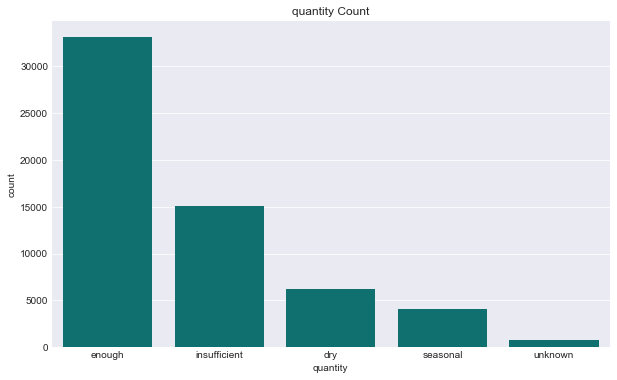

In [188]:
# Plot water_quantity count
plot.count('quantity')

While most wells provide enough water quantities to the surrounding communities, a number of them are insufficient, dry, seasonal and unknown.

This column has just enough unique values to consider OneHotEncoding.

#### *Water Source Count*

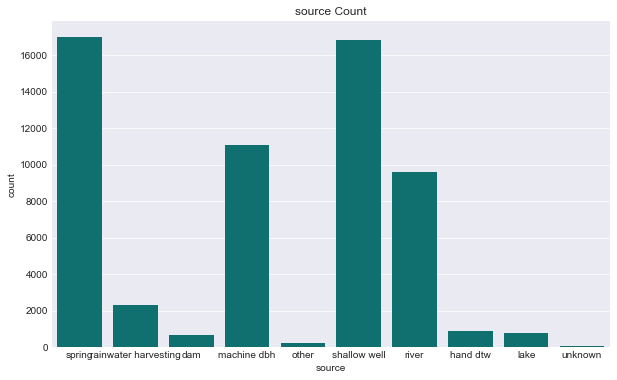

In [189]:
# Plot source count
plot.count('source')

The most common sources of water are springs, shallow wells, rivers and machine dbh.

This column is also a good candidate for OneHotEncoding, categories with less than 500 records will be added to a single category `others`.

#### *Well Management Count*

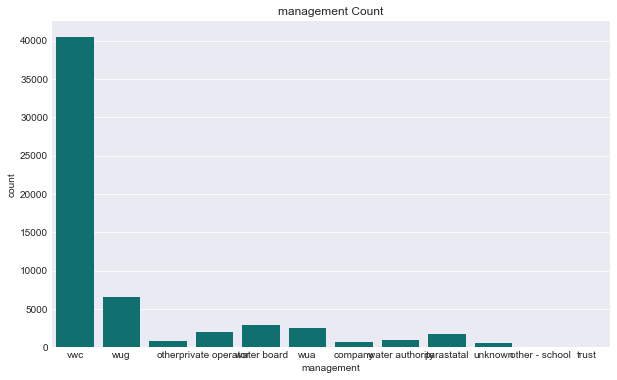

In [190]:
# Plot management count
plot.count('management')

Almost 85% of the wells in Tanzania are managed by Village Water Councils, the other managers are WUGs, private operators, WUAs, parastatls etc.

With the categories with kess records being added to the `others` category, OneHotEncoding could be used to encode the column.

#### *Extraction Type Count*

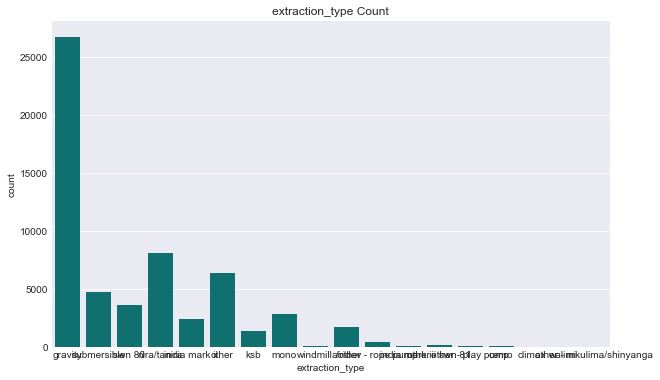

In [191]:
# Plot extraction_type count
plot.count('extraction_type')

Gravity is the most popular extraction type used.

In this column, all categories with records below 1000, will be added to the `others` category to make it suitable for OneHotEncoding.

#### *Basin Count*

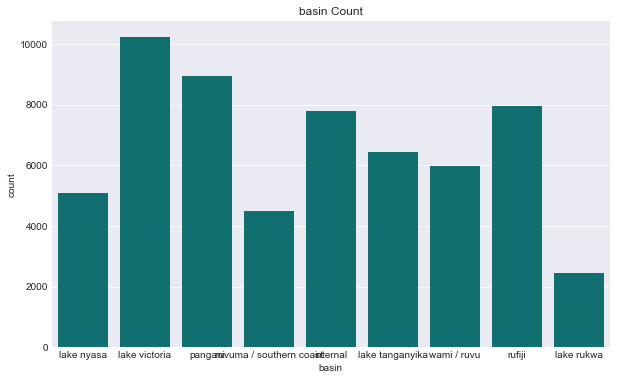

In [192]:
# Plot basin count
plot.count('basin')

The unique values in this column are distributed well, and it is also a good candidate for OneHotEncoding.

### **Relationship Between Target and Selected Predictors**
In this section, we are plotting selected columns against the target variable. This is to help understand the relationship between some well aspects and their functionality.

The selected columns are:
- basin

- extraction type class

- funder

- installer

- source type

We are using OOP to ease the process.

In [193]:
# Create a countplot + hue class.
class Rlshp_EDA:
    plt.style.use('dark_background') # -> Set the plot style. (Choose dark because the class 0, wasn't visible in light figures.)
    '''This class takes in a dataset, and by adding columns names for x and y axes, it returns a
       barplot that displays the relationship between the two columns.
       0 = non functional
       1 = functional
       2 = functional needs repair'''

    def __init__(self, data, figsize=(12, 6)):
        self.data = data
        self.figsize = figsize

    def bar(self, x_data, hue): # -> Plot relationships.
        self.x_data = x_data
        self.hue = hue
        plt.figure(figsize=self.figsize)
        sns.countplot(data= self.data, x= self.x_data, hue= self.hue, color= 'teal')
        plt.title(f'{self.hue} vs {self.x_data}')
        plt.xlabel(self.x_data)
        plt.ylabel(self.hue)
        return plt.show()

#### *Basin vs Functionality*
This plot will help us understand the regions near lakes/ rivers where wells are most likely to work, or fail.

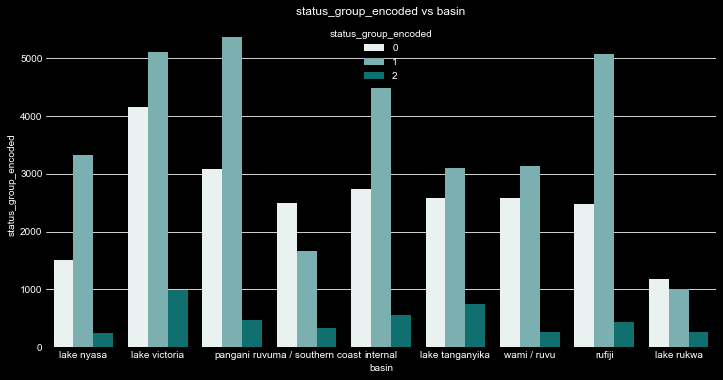

In [194]:
# Create a copy of cleaned data.
X_plot = X_cleaned.copy()
X_plot['status_group_encoded'] = y_encoded

# Instantiate the class.
plot = Rlshp_EDA(X_plot)

# Plot basin vs target
plot.bar(x_data= 'basin', hue= 'status_group_encoded')

- Regions near Pangani, lake Victoria, Rufiji and Internal basins have the most functional wells in the country with about 4000 to 5000 wells each.

- Despite being one of the basins with the most functional wells, lake victoria holds the title of the basin with the most non functional wells in Tanzania standing at more than 4000 non functional wells.

- Lake Victoria also holds the title of the lake with the most wells that need repairs.

- There are more non-functional wells in lake Rukwa basin than functional wells.

#### *Funder vs Functionality*
This will help us identify the funder with the most functional wells.

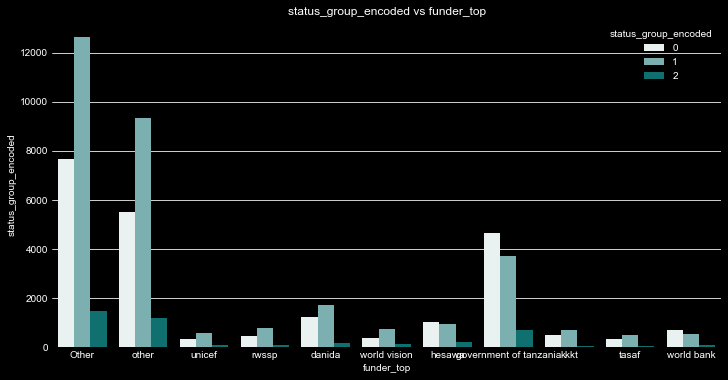

In [195]:
# Get top N funders
top_n = 10
top_funders = X_plot['funder'].value_counts().nlargest(top_n).index.tolist()

# Create a simplified column
X_plot['funder_top'] = X_plot['funder'].apply(lambda x: x if x in top_funders else 'Other')

# Plot funder vs functionality
plot.bar(x_data='funder_top', hue='status_group_encoded')

- The Government of Tanzania is the largest funder of wells in the country, which makes a lot of sense because they have a water development strategy. Despite them being the largest funder, they have the largest number of non functional wells than any other single entity. The number of non functional wells are almost the same number as their functional and functional but need repair wells combined.

- There are also some other single entities that have more non functional wells than functional wells.

- Funders in the others category, these are churches, villages, single doners etc, have the highest number of functioning wells combined.

#### *Installer vs Functionality*
Plotting this will help us know what insteller companies or individuals build the best wells.

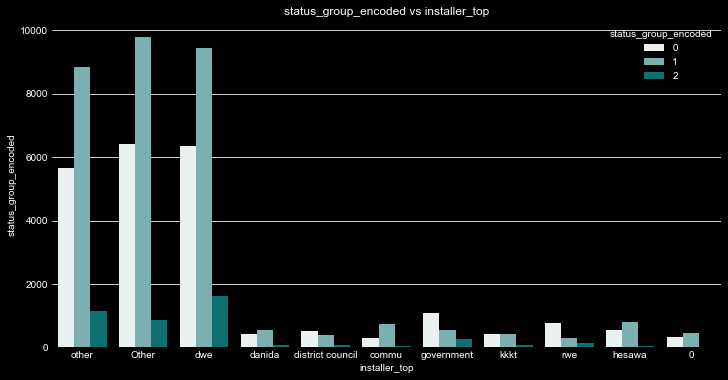

In [196]:
# Get top N installers
top_n = 10
top_installers = X_plot['installer'].value_counts().nlargest(top_n).index.tolist()

# Create a simplified column
X_plot['installer_top'] = X_plot['installer'].apply(lambda x: x if x in top_installers else 'Other')

# Plot installer vs functionality
plot.bar(x_data='installer_top', hue='status_group_encoded')

- The Tanzanian District Water Engineer (DWE) is the installer with the most functional wells with over 9000 wells across the country. This is a significant difference comparing all the other installers. However, it still has a huge number of non functional wells, standing slightly above 6000 wells. 

- Other installers also have a very high number of functional wells, with almost 19,000 functional wells across Tanzania and about 13,000 non functional wells.

- The number of wells that need repair is significantly lower than the functional and the non functional wells, but still raises concerns.

#### *Extraction Type vs Functionality*
An extraction type determines if the well is going to be durable or not. Here we are trying to identify extraction types that have produced the most functional wells.

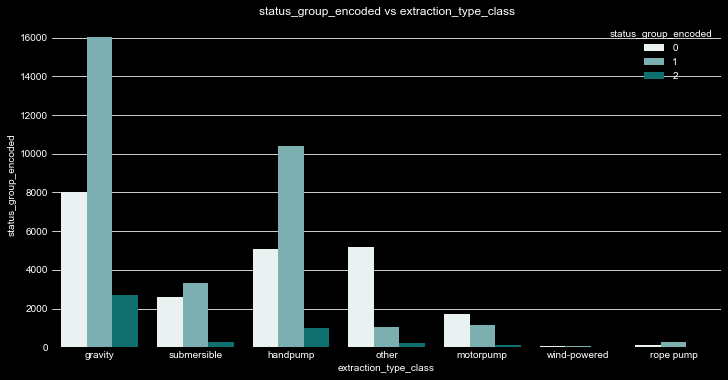

In [197]:
# Plot extraction type against functionality
plot.bar(x_data='extraction_type_class', hue='status_group_encoded')

- Wells extrected using gravity seem to be durable than every other extraction types with about 16,000 functional wells, followed closely by hand pumps at slightly above 10,000 wells and surbmersibles at about 3500 wells.

- Wells extracted using motor pumps seem to have more non functional wells than functioning wells.

#### *Water Source vs Functionality*

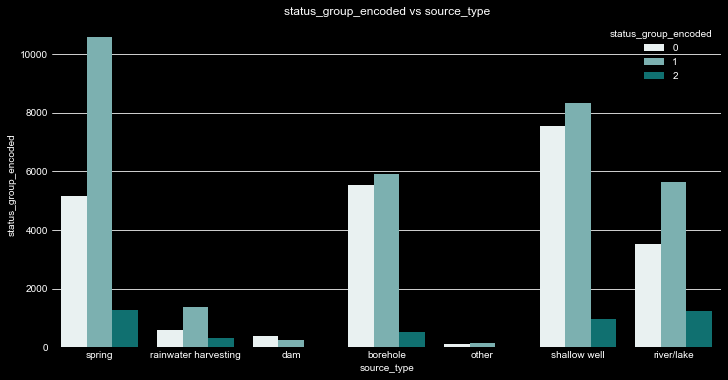

In [198]:
# Plot source against functionality
plot.bar(x_data='source_type', hue='status_group_encoded')

- Weels that source water from springs have the highest number of wells at a little 10,000 functional wells, followed by water from shallow wells, however, this source also has the higest number of non functional wells.

### **Correlation**
In this section we are checking if the columns are correlated. 

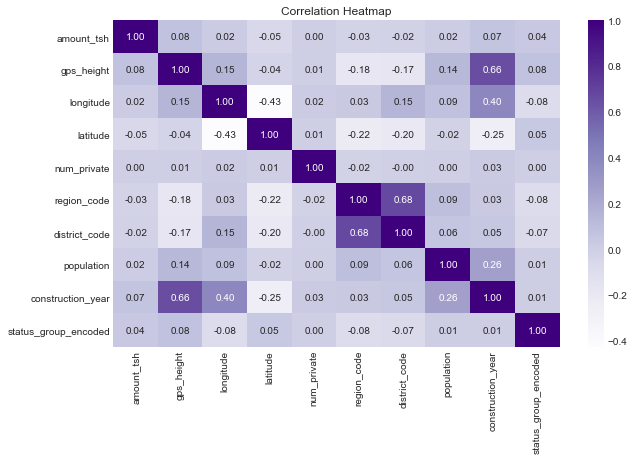

In [199]:
# Add encoded y to a copy of the X_cleaned dataset
X_plot = X_cleaned.copy()
X_plot['status_group_encoded'] = y_encoded  # From earlier

# Perform correlation
plt.style.use('seaborn-darkgrid') # -> Set the plot style.
corr = X_plot.select_dtypes(include='number').corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Of all the numerical features in the dataset, there is only one correlation, the other columns are not correlated at all.

## **Data Preprocessing**
In this section we are preprocessiong our data for training and testing purposes. This process involves:

- Feature selection

- train/test splitting.

This part is crucial as it ensures the data is in a suitable format for training and evaluation.

### **Feature Selection**
Our dataset has over 30 features, in this section we are choosing the most relevant features that will help us predict the functionality status of wells across Tanzania.

Our decision will be guided by the `Metadata.txt` file in the `Data` folder that contains the description of the columns in the dataset as well as domain knowledge on well construction.

The features will include:
- **construction_year**: The construction year of a wellis the most important feature as older wells are more likely to break down or need repairs due to aging infrastructure.

- **funder and installer**: Certain funders or installers may have better (or worse) track records in constructing durable wells.

- **amount_tsh, quantity, water_quality**: This represents the amount of water the well is supplying. Wells with very low or zero water output may be broken or drying up.

- **extraction_type_class**:  The technology used influences durability and likelihood of breakdown.

- **longitude, latitude, region**: Location affects terrain, water table depth, and accessibility. Some regions are prone to droughts or poor infrastructure.

- **source_type**: The type and reliability of the water source affects a well’s ability to consistently provide water.

- **basin, subvillage, lga**:  These can serve as proxies for environmental or political factors that affect well maintenance.

- **population**: Overused wells (those serving too many people) may wear out faster.

- **management, management_type**: Wells that are managed by trained, accountable entities (e.g., water user groups or governments) may have better upkeep.

- **permit, public_meeting**: These serve as proxies for whether community consultation and legal registration occurred.

In [200]:
# Filter the relevant columns and store them in variable X.
X = X_cleaned[['funder', 'construction_year', 'installer', 'amount_tsh', 'quantity', 'extraction_type_class', 'longitude', 'latitude', 'region', 'source_type', 'basin', 'lga',
               'population', 'water_quality', 'management', 'management_group', 'permit', 'public_meeting']]

# Copy the encoded dataset and store it in variable y
y = y_encoded.copy()

# Preview X
X.head()

,funder,construction_year,installer,amount_tsh,quantity,extraction_type_class,longitude,latitude,region,source_type,basin,lga,population,water_quality,management,management_group,permit,public_meeting
0,roman,1999,other,6000.0,enough,gravity,34.938093,-9.856322,iringa,spring,lake nyasa,ludewa,109,soft,vwc,user-group,False,True
1,other,2010,other,0.0,insufficient,gravity,34.698766,-2.147466,mara,rainwater harvesting,lake victoria,serengeti,280,soft,wug,user-group,True,True
2,other,2009,world vision,25.0,enough,gravity,37.460664,-3.821329,manyara,dam,pangani,simanjiro,250,soft,vwc,user-group,True,True
3,unicef,1986,unicef,0.0,dry,submersible,38.486161,-11.155298,mtwara,borehole,ruvuma / southern coast,nanyumbu,58,soft,vwc,user-group,True,True
4,other,0,artisan,0.0,seasonal,gravity,31.130847,-1.825359,kagera,rainwater harvesting,lake victoria,karagwe,0,soft,other,other,True,True


Out of 38 features, we are only using 18 for our modeling.

### **Train_Test_Split**
This is an essential step for our model as the test dataset will help us calculate how accurate the model is.

In [201]:
# Split the dataset into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

## **Modeling**
This section brings us back to the project's question, '*can we predict a well's functionality status using the data given?*'.

Here we are performing classification modeling to help us predict whether a well is:
- functional

- non functional

- functional need repair

We are using three types of classification algorithms, namely: **LogisticRegression, DecisionTreeClassifier, RandomForest**

The process includes:
- Preprocessing Data based on the requirements of the different algorithms.

- Modeling the baseline models to help us understand how hard the problem is, get a benchmark accuracy/F1 score and also for comparison with more complex models later.

- Model tuning to help us get more favourable accuracy scores.

- Evaluation of these models.

### **LogisticRegression()**
We are using `LogisticRegression()` to predict multiple labels. At this point, our data is not standardized and it also contains categorical columns. In the next step we are preprocessing our data by standardizing and encoding it.

This is important because logistic regression only works with standardized numerical columns and encoded categorical data.

#### *Standardization*
Earlier we saw that the numerical columns are all skewed, because tey have outliers. In this section we are standardizing them using the `StandardScaler` to center them and give them a mean of 1 and a standard deviation of 0.

In [202]:
# Retrieve the numerical columns
numerical_columns = X_train.select_dtypes(include= 'number')

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit_Transform the numerical columns and turn them to a dataframe.
numerical_columns = pd.DataFrame(scaler.fit_transform(numerical_columns), columns= numerical_columns.columns)

# Preview
numerical_columns.head()

,construction_year,amount_tsh,longitude,latitude,population
0,0.730627,-0.084999,0.204135,0.501977,-0.041306
1,-1.370863,-0.100621,0.216991,-0.006643,-0.379739
2,-1.370863,-0.100621,-0.243403,-1.147020,-0.379739
3,-1.370863,-0.100621,-0.004716,-1.061741,-0.379739
4,0.729576,-0.006889,0.449866,-0.114078,-0.125914


All the numerical columns are now standardized.

#### *Encoding*
In this section we are encoding all the categorical columns, this is because algorithms such as logistic regression do not work well with categorical data.

The data we are working with however, has a lot of categorical data, and some even have more than 1000 unique values. What we are going to do is group the columns into four categories then deal with them in the following ways:

| Cardinality        | Encoding Technique       | Tool                        |
| ------------------ | ------------------------ | --------------------------- |
| **Low** (<10)      | One-Hot Encoding         | `pd.get_dummies()`          |
| **Medium** (10–50) | Ordinal Encoding         | `OrdinalEncoder`            |
| **High** (50–200)  | Frequency/Target/Hashing | `Map`, `FeatureHasher`      |
| **Very High**      | Drop/Group + Encode      | Manual grouping then encode |

##### `Analyzing cardinality`
Here we will be looking at what columns fit into what group of cardinality.

In [203]:
# Retrieving categorical columns
cat_cols = X_train.select_dtypes(include='object').columns

# Analyze cardinality
cardinality = {col: X[col].nunique() for col in cat_cols}
card_df = pd.DataFrame.from_dict(cardinality, orient='index', columns=['Unique_Values'])
card_df = card_df.sort_values(by='Unique_Values', ascending=False)
print(card_df)

                       Unique_Values
lga                              125
funder                            92
installer                         80
region                            21
management                        12
basin                              9
water_quality                      8
extraction_type_class              7
source_type                        7
quantity                           5
management_group                   5


The columns are categorized into 4 groups as follows:

| Category | Number of Columns |
|--------- | ----------------- |
| Low      | 6                 |
| Medium   | 2                 |
| High     | 3                 |

##### `Encode according to cardinality`
Here, we are encoding the categorical columns according to their cardinality category.
- For columns with low cardinality we are using OneHotEncoder.

- For columns with medium cardinality, more than 10 and less that 50 unique values, we are using OrdinalEncoder.

- For columns with high cardinality, more tat 50 and less than 200 unique values, we are using frequency encoding.

In [204]:
# Make a copy of the original X dataframe
X_encoded = X_train.copy()

# Save encoder objects for reuse
encoders = {}
hashed_columns = []

for col in cat_cols:
    n_unique = X_train[col].nunique()

    if n_unique <= 10: # -> low cardinality columns
        # One-hot encode
        dummies = pd.get_dummies(X_train[col], prefix=col, drop_first=True)
        X_encoded = pd.concat([X_encoded.drop(columns=[col]), dummies], axis=1)

    elif n_unique <= 50: # -> medium cardinality columns
        # Ordinal encode
        oe = OrdinalEncoder()
        X_encoded[col] = oe.fit_transform(X_train[[col]])
        encoders[col] = oe

    else: # -> high cardinality columns
        # Frequency encode
        freq_map = X_train[col].value_counts().to_dict()
        X_encoded[col] = X_train[col].map(freq_map)

All the categorical columns are encoded. 

The dataframe also contained numerical columns, in the next cell we are dropping them so as to remain with only the encoded categorical columns.

In [205]:
# Drop the numerical columns
X_encoded.drop(columns= ['construction_year', 'amount_tsh', 'longitude', 'latitude', 'population'], inplace= True)

# Reset dataset's index.
X_encoded.reset_index(drop= True, inplace=True)

# Preview
X_encoded.head()

,funder,installer,region,lga,management,permit,public_meeting,quantity_enough,quantity_insufficient,quantity_seasonal,...,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group
0,149,308,8.0,400,9.0,True,True,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,12756,172,2.0,174,7.0,True,True,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1047,741,10.0,844,7.0,False,True,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,12756,12499,10.0,491,7.0,True,True,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,102,12499,11.0,876,7.0,True,True,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In the preview we notice that we still have some categorical columns that contain boolean values. In the next cell we are changing the data types to integers.

In [206]:
# Put the boolean containin columns names in a list
bool_columns = ['permit', 'public_meeting']

# Loop pover the columns and turn them into integers
for col in bool_columns:
    X_encoded[col] = X_encoded[col].astype('int')

# Check the datatypes of all the categorical columns
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47520 entries, 0 to 47519
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   funder                              47520 non-null  int64  
 1   installer                           47520 non-null  int64  
 2   region                              47520 non-null  float64
 3   lga                                 47520 non-null  int64  
 4   management                          47520 non-null  float64
 5   permit                              47520 non-null  int32  
 6   public_meeting                      47520 non-null  int32  
 7   quantity_enough                     47520 non-null  uint8  
 8   quantity_insufficient               47520 non-null  uint8  
 9   quantity_seasonal                   47520 non-null  uint8  
 10  quantity_unknown                    47520 non-null  uint8  
 11  extraction_type_class_handpump      47520

Everything looks good, next we are concatenating the two dataframes.

In [207]:
# Concatenate the 2 dataframes (standardized numerical columns and encoded categorical columns)
X_preprocessed = pd.concat([numerical_columns, X_encoded], axis= 1)

# Preview the column names.
X_preprocessed.columns

Index(['construction_year', 'amount_tsh', 'longitude', 'latitude',
       'population', 'funder', 'installer', 'region', 'lga', 'management',
       'permit', 'public_meeting', 'quantity_enough', 'quantity_insufficient',
       'quantity_seasonal', 'quantity_unknown',
       'extraction_type_class_handpump', 'extraction_type_class_motorpump',
       'extraction_type_class_other', 'extraction_type_class_rope pump',
       'extraction_type_class_submersible',
       'extraction_type_class_wind-powered', 'source_type_dam',
       'source_type_other', 'source_type_rainwater harvesting',
       'source_type_river/lake', 'source_type_shallow well',
       'source_type_spring', 'basin_lake nyasa', 'basin_lake rukwa',
       'basin_lake tanganyika', 'basin_lake victoria', 'basin_pangani',
       'basin_rufiji', 'basin_ruvuma / southern coast', 'basin_wami / ruvu',
       'water_quality_fluoride', 'water_quality_fluoride abandoned',
       'water_quality_milky', 'water_quality_salty',
       'w

In [208]:
X_preprocessed.head()

,construction_year,amount_tsh,longitude,latitude,population,funder,installer,region,lga,management,...,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group
0,0.730627,-0.084999,0.204135,0.501977,-0.041306,149,308,8.0,400,9.0,...,0,0,0,0,1,0,0,0,0,1
1,-1.370863,-0.100621,0.216991,-0.006643,-0.379739,12756,172,2.0,174,7.0,...,0,0,0,0,1,0,0,0,0,1
2,-1.370863,-0.100621,-0.243403,-1.147020,-0.379739,1047,741,10.0,844,7.0,...,0,0,0,0,1,0,0,0,0,1
3,-1.370863,-0.100621,-0.004716,-1.061741,-0.379739,12756,12499,10.0,491,7.0,...,0,0,0,0,1,0,0,0,0,1
4,0.729576,-0.006889,0.449866,-0.114078,-0.125914,102,12499,11.0,876,7.0,...,0,0,1,0,0,0,0,0,0,1


#### *Baseline Model*
In our base model we are using a solver of `lbfgs` which works fast for multiclass classifications and a maximum iteration of `500`.

c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.66      0.37      0.47     18252
           1       0.61      0.88      0.72     25802
           2       0.19      0.01      0.02      3466

    accuracy                           0.62     47520
   macro avg       0.49      0.42      0.41     47520
weighted avg       0.60      0.62      0.58     47520



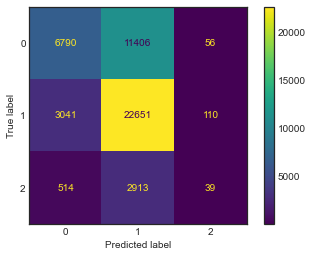

In [209]:
# Train and fit the baseline model
y_train_reg = y_train.copy()
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500).fit(X_preprocessed, y_train_reg)

# Create a predicted y
y_pred = logreg.predict(X_preprocessed)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_train_reg, y_pred))

conf_matrix = confusion_matrix(y_train_reg, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
- The `baseline model's` overall performance is bad, the model's F1-score stands at 41%, with functionality having the highest F1-score of 72%. A low F1-score states that the overall model is not doing well.

- Also, the model's accuracy is 62% with precision and recall scores standing at 49% and 42% respectively.

`interpreting confusion matrix`

We are going to calculate the True and False Positives and the True and False Negatives. 

In [210]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_train_reg, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP     FN     TN
0      0   6790   3555  11462  25713
1      1  22651  14319   3151   7399
2      2     39    166   3427  43888


- The model is best at predicting Functional (label 1), it has the highest true positives at 22,651 and the lowest false negatives.

- Functional Needs Repair (label 2) is being under-predicted heavily with only 39 true positives and false negatives OF 3427.

This suggests class imbalance.

- Additionally, a lot of Non-Functional (label 0) wells are being misclassified as Functional (label 1), 11,462 misclassifications.

#### *Model 2: `Dealing with class imbalance`*
In the previous model, we have noticed that one class is predicted better than the rest, suggesting class imbalance, here we are:
- Dealing with the class imbalance

- Adding the number of `max_iter`

To deal with the class imbalance, we are using `class_weight='balanced'` to tell the model to pay equal attention to all the classes even though one is rarer.

c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     18252
           1       0.66      0.47      0.55     25802
           2       0.13      0.41      0.20      3466

    accuracy                           0.48     47520
   macro avg       0.43      0.46      0.42     47520
weighted avg       0.56      0.48      0.51     47520



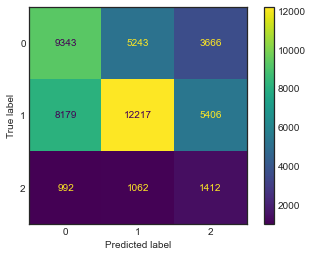

In [211]:
# Train and fit the class_balanced model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight= 'balanced').fit(X_preprocessed, y_train_reg)

# Create a predicted y
y_pred = logreg.predict(X_preprocessed)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_train_reg, y_pred))

conf_matrix = confusion_matrix(y_train_reg, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
- This model has performed slightly better than the previous one, when it comes to the F1-score standing at 42%, an increase of only 1%.

- However, when it comes to accuracy, this model has performed worse than the baseline model, standing at 48% accuracy from 62% accuracy.

- Additionally, the precision and recall scores have balanced out each other, with precision dropping to 43% and recall rising to 46%.

`Interpreting confusion matrix`

In [212]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_train_reg, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP    FP     FN     TN
0      0   9343  9171   8909  20097
1      1  12217  6305  13585  15413
2      2   1412  9072   2054  34982


When it comes to the confusion matrix, this model performs better than the baseline model, but there's still signs of class imbalance.

- Functional (class 1), still holds the position of the class with the highest true positives, but also with the highest number of misclassifications, false negatives = 11585 from being the lowest in the baseline model.

- We see an improvement in the Functional Needs Repair (class 2) label, number of true positives have gone up to 1412 from 39, but we also have an increase in false negatives.

#### *Model 3: `Using another class imbalance fixing tool`*
Using `class_weight = 'balanced'` improved the class balance in the previous model, but depreciated the model's accuracy. 

Here we are using an alternative class imbalance tool, in addition to that, we are tuning our model further by switching the solver to `saga`, because it is well equiped to deal with larger datasets and a C of `100`.

The class imbalance tool is `Synthetic Minority Over-sampling Technique (SMOTE)`. It works the same as the class_weight, but it goes an extra mile and generates synthetic samples for the minority class.

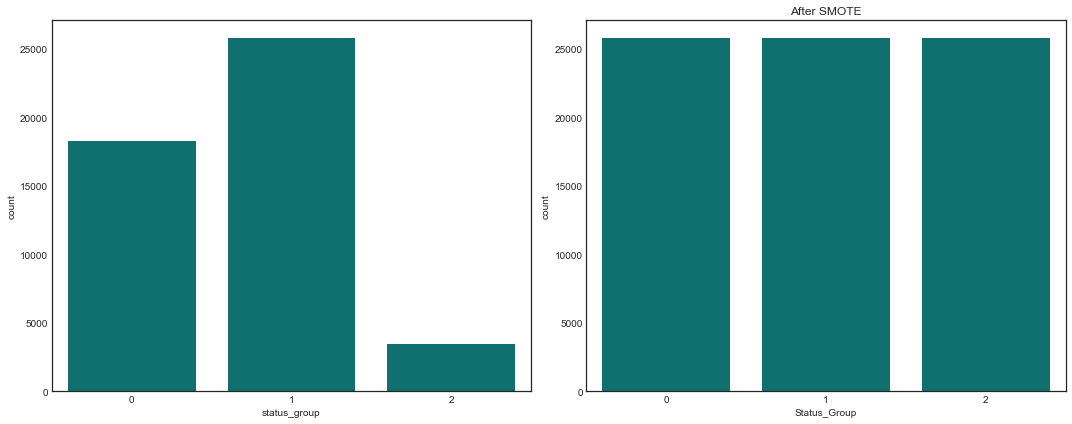

In [213]:
# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_preprocessed, y_train_reg)


fig, (ax1, ax2) = plt.subplots(figsize = (15, 6), ncols= 2)

# Plot ax1, before SMOTE
sns.countplot(data= y_train_reg, x= 'status_group', ax= ax1, color= 'teal')
plt.title('Before SMOTE')
plt.xlabel('Status_Group')

# Plot ax2, after SMOTE
sns.countplot(data= y_train_resampled, x= 'status_group', ax= ax2, color= 'teal')
plt.title('After SMOTE')
plt.xlabel('Status_Group')

plt.tight_layout()
plt.show()

From the plot above, we see that SMOTE has generated samples that have balanced the target varibales.

c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.43      0.48      0.46     25802
           1       0.42      0.31      0.36     25802
           2       0.45      0.51      0.48     25802

    accuracy                           0.44     77406
   macro avg       0.43      0.44      0.43     77406
weighted avg       0.43      0.44      0.43     77406



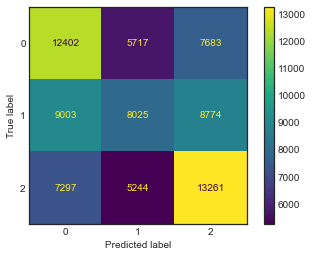

In [214]:
# Train and fit the SMOTE model
logreg = LogisticRegression(multi_class='multinomial', solver='saga', C= 100, max_iter=1000).fit(X_train_resampled, y_train_resampled)

# Create a predicted y
y_pred = logreg.predict(X_train_resampled)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_train_resampled, y_pred))

conf_matrix = confusion_matrix(y_train_resampled, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
- This model has performed better than the previous 2, with an F1-score of 43% up from 42% and 41%. This may indicate the model is doing slightly better in one aspect.

- Accuracy, however, keeps plopping further down. This model's accuracy score stands at 44% up from 48%. As the F1-score indicates an aspect is improving, the accuracy is making a point that there is another aspect that is failing.

- Prediction score has remained constant from the previous model, while the recall score has dropped to 44%.

We switched to `saga` and a C of `100`, but our model performed worse overall than the other 2.

`Interpreting confusion matrix`

In [215]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_train_resampled, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP     FN     TN
0      0  12402  16300  13400  35304
1      1   8025  10961  17777  40643
2      2  13261  16457  12541  35147


This model has done a brilliant job of balancing everything else, better than the previous 2 models.

- Despite balancing everything, the model still has a huge number of false positives and negatives.

- The false positives are in bigger numbers than the true positives, indicating that there is an issue with our model.

#### *Model 4: `Hyperparameter Tuning`*
Our issue with class imbalance seems to have been solved, however, our model still remains non-functional. In this section, we are using `GridSearchCV()` to tune our hyperparameters and find parameters that yield maximum scores for our model.

In [216]:
# Define model
log_reg = LogisticRegression(solver= 'liblinear', penalty= 'l1')  # Use solver = 'liblinear' and penalty = 'l1'

# Define the hyperparameter grid
param_dist = {
    'C': [0.01, 0.1, 1, 10],            # Regularization strength (smaller = stronger regularization)
    'max_iter': [100, 500, 1000]
}

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, 
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose= 1)

# Fit to training data
rand_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters
print("Best params:", rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.6min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best params: {'max_iter': 100, 'C': 1}


In [217]:
# Predict the train data.
y_pred = rand_search.predict(X_train_resampled)

# Evaluate performance
print("Classification report:\n", classification_report(y_train_resampled, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.59     25802
           1       0.57      0.70      0.63     25802
           2       0.62      0.64      0.63     25802

    accuracy                           0.62     77406
   macro avg       0.63      0.62      0.62     77406
weighted avg       0.63      0.62      0.62     77406



##### `Summary`
The RandomizedSearchCV has boosted our model significantly, even though the accuracy score is the same, the tuned model is better than the baseline model.

- In this model, the F1-score, accuracy and recall scores are all equal, standing at 62%, and the precision score is only higher by 1%. This means that the model's performance is evenly balanced between being accurate (precision) and complete (recall), and the F1-score reflects that.

- What this means is that:
   - we are getting consistent predictions for that class.

   - The model isn't favoring precision over recall (or vice versa).

This performance is good, compared to the other model performances, however, 62% is still quite low, meaning the model can still be improved.

`Interpreting the confusion matrix`

In [218]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_train_resampled, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP     FN     TN
0      0  13342   6091  12460  45513
1      1  17990  13491   7812  38113
2      2  16477  10015   9325  41589


Of all the models, this models performs best when it comes to the confusion matrix. Here's why:

- The number of true positives is higher than the number of false negatives, also, the number of true negatives is higher than the number of false negatives. 

- **Non functional**: Has the highest true negatives and false negatives.

- **Functional**: Has the highest true positives and false positives.

- **Functional need repair**: Performed significantly better that all the other instances.

#### *Cross Validation*

In [219]:
# Cross validate the rf model.
scores = cross_val_score(rand_search, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.2min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.9min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.4min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Cross-validated Accuracy: [0.59191319 0.62444287 0.62237582 0.61643305 0.61585169]
Mean Accuracy: 0.6142033213204636


#### **LogisticRegression() Summary**
After 4 iterations of the `LogisticRegression()` models, we are switching to another classification model, `DecisionTreeClassifier()`.

- **baseline model**: We achieved an accuracy score of 62%, however, the precision, recall and F1 scores were not good. Also the prediction was biased towards the functional class.

- **model 2- class imbalance 1**: we had an accuracy score of 48%, and the other scores dropped as well, except the recall score, which went up by only a few points. The predictions did not improve that much either, there seemed to still be some biasness.

- **model 3- SMOTE**: After using SMOTE, our accuracy scores went down further, together with all other scores. despite the drop in scores, the predictions seemed to do much better, seem more balanced.

- **model 4- RandomizedSearchCV**: using this to tune our model seemed to work better than all other models. The accuracy score improved significantly from the previous models, except the baseline model, where the score was the same. However, there was a significant difference in their other scores at 62% for all except precision which stood at 63%. The predictions also did better, with false positives and false negatives significantly reducing and being less that the true positives and true negatives.

### **DecisionTreeClassifier()**
This is the second classification algorithm model we are using in this project.

We are switching to decision trees because they are considered better than logistic regression in certain situations due to their ease of interpretation and ability to handle non-linear relationships and outliers.

This is important for our project as in the EDA section we saw that there was no correlation between the predictors. And even though correlation does not mean linearity, but it indicates that there might be some kind of relationship somewhere.

#### *Baseline DT Model*
For our baseline model we are using the already preprocessed and balanced datasets, `X_train_resampled` and `y_train_resampled`.

Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.46      0.55     25802
           1       0.57      0.57      0.57     25802
           2       0.46      0.62      0.53     25802

    accuracy                           0.55     77406
   macro avg       0.58      0.55      0.55     77406
weighted avg       0.58      0.55      0.55     77406



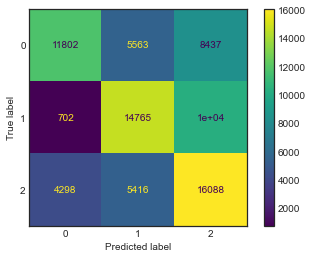

In [220]:
# Define model
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 42).fit(X_train_resampled, y_train_resampled)

# Create a predicted y
y_pred = dt.predict(X_train_resampled)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_train_resampled, y_pred))

conf_matrix = confusion_matrix(y_train_resampled, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
The baseline model has performed moderately, having achieved an accuracy score of 55%. It is not a good start, but it is not bad either.

- Other than the accuracy score, the model's precision score stands at 58%, which is slightly higher than the F1 and recall score which stand at an equal score of 55%. As stated in the previous section, equal scores means that the model is balanced.

- However, the model favours precision over recall by 3 points.

`Interpreting confusion matrix`

In [221]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_train_resampled, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP     FN     TN
0      0  11802   5000  14000  46604
1      1  14765  10979  11037  40625
2      2  16088  18772   9714  32832


The model has balanced the predictions pretty well.

- Functional needs repair has the highest true positives and the lowest false negatives.

- Non functional has the highest true negatives and the lowest false positives.

This not only means that our dataset is well balanced, but that the model predicts all the classes equally.


#### *Model 2: Back to original training data*
In this section we are going back to the original training data, by doing that we are begin the preprocessing process.

This section involves:
- Ordinal Encoding all the categorical data: this is because OneHotEncoding our data created a lot of column, in attempt to reduce them, we are using OrdinalEncoder this time because DecisionTreeClassifier() can work with that and OneHotEncoding is not necessary.

In [222]:
# Make a copy of teh original training data.
X_dt = X_train.copy()

# Preview
X_dt.head()

,funder,construction_year,installer,amount_tsh,quantity,extraction_type_class,longitude,latitude,region,source_type,basin,lga,population,water_quality,management,management_group,permit,public_meeting
3607,dmdd,1998,dmdd,50.0,insufficient,gravity,35.426020,-4.227446,manyara,spring,internal,babati,160,soft,water board,user-group,True,True
50870,other,0,gove,0.0,enough,handpump,35.510074,-5.724555,dodoma,shallow well,internal,bahi,0,soft,vwc,user-group,True,True
20413,kkkt,0,kkkt,0.0,enough,other,32.499866,-9.081222,mbeya,shallow well,lake rukwa,mbozi,0,soft,vwc,user-group,False,True
52806,other,0,other,0.0,insufficient,gravity,34.060484,-8.830208,mbeya,river/lake,rufiji,mbarali,0,soft,vwc,user-group,True,True
50091,ki,1997,other,300.0,enough,other,37.032690,-6.040787,morogoro,shallow well,wami / ruvu,kilosa,120,salty,vwc,user-group,True,True


In [223]:
# Save encoder objects for reuse
encoders = {}

for col in cat_cols:
    n_unique = X_train[col].nunique()

    if n_unique <= 50: # -> encode columns with less than 50 unique values.
        # Ordinal encode
        oe = OrdinalEncoder()
        X_dt[col] = oe.fit_transform(X_train[[col]])
        encoders[col] = oe

    else: # -> encode columns with less than 50 unique values.
        # Frequency encode
        freq_map = X_train[col].value_counts().to_dict()
        X_dt[col] = X_train[col].map(freq_map)

# Put the boolean containing columns names in a list
bool_columns = ['permit', 'public_meeting']

# Loop pover the columns and turn them into integers
for col in bool_columns:
    X_dt[col] = X_dt[col].astype('int')

# Preview
X_dt.head()

,funder,construction_year,installer,amount_tsh,quantity,extraction_type_class,longitude,latitude,region,source_type,basin,lga,population,water_quality,management,management_group,permit,public_meeting
3607,149,1998,308,50.0,2.0,0.0,35.426020,-4.227446,8.0,6.0,0.0,400,160,6.0,9.0,4.0,1,1
50870,12756,0,172,0.0,1.0,1.0,35.510074,-5.724555,2.0,5.0,0.0,174,0,6.0,7.0,4.0,1,1
20413,1047,0,741,0.0,1.0,3.0,32.499866,-9.081222,10.0,5.0,2.0,844,0,6.0,7.0,4.0,0,1
52806,12756,0,12499,0.0,2.0,0.0,34.060484,-8.830208,10.0,4.0,6.0,491,0,6.0,7.0,4.0,1,1
50091,102,1997,12499,300.0,1.0,3.0,37.032690,-6.040787,11.0,5.0,8.0,876,120,4.0,7.0,4.0,1,1


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.50      0.63     18252
           1       0.66      0.94      0.78     25802
           2       0.71      0.00      0.00      3466

    accuracy                           0.70     47520
   macro avg       0.74      0.48      0.47     47520
weighted avg       0.73      0.70      0.66     47520



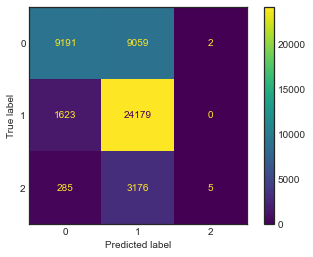

In [224]:
X_dtree = X_dt.copy()
y_dtree = y_train.copy()

# Define model
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 42).fit(X_dtree, y_dtree)

# Create a predicted y
y_pred = dt.predict(X_dtree)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_dtree, y_pred))

conf_matrix = confusion_matrix(y_dtree, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
This model's performance is better than any of the previous models, logistic regression models included. Reducing the columns has proved to be a better strategy.

- The model has achieved an accuracy of 70%, however, the F1-score stands at 47% indicating that this is not a good model.

- Additionally, the model favours precision over recall score, signaling that the model is experiencing class imbalance issues.

`Interpreting confusion matrix`

In [225]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_dtree, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP    FN     TN
0      0   9191   1908  9061  27360
1      1  24179  12235  1623   9483
2      2      5      2  3461  44052


From the fisrt glance, we can tell that the model is imbalanced.

- The model is significantly underpredicting the `functional needs repair` class, and overpredicting the `functional` class.

- Functional class has the highest true positives and the lowest false negatives.

- Functional needs repair has the highest true negatives and the lowest false positives.

#### *Model 3: `Using SMOTE on DT data`*
Since we repreprocessed our training data to fit the needs of this classification algorithm, we are going to use SMOTE again to resample our data.

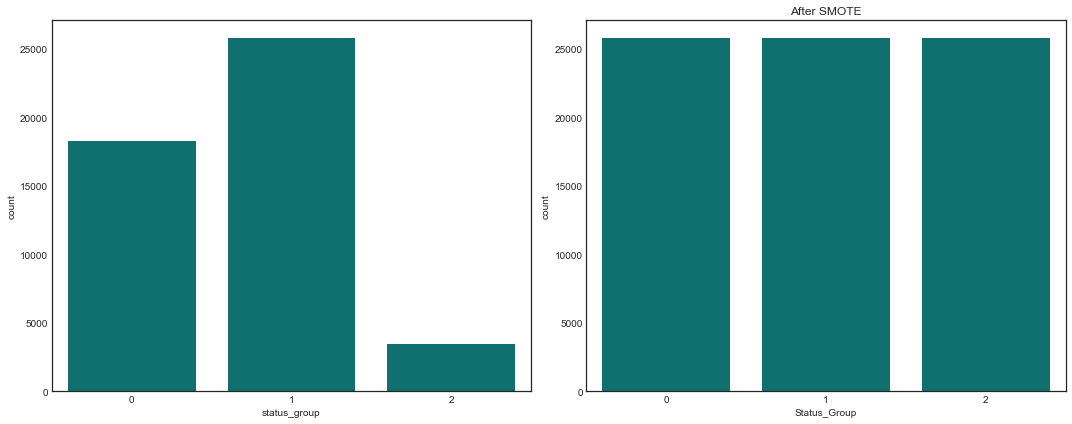

In [226]:
# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_dt_resampled, y_dt_resampled = smote.fit_resample(X_dtree, y_dtree)

# Plotting before and after SMOTE
fig, (ax1, ax2) = plt.subplots(figsize = (15, 6), ncols= 2)

# Plot ax1, before SMOTE
sns.countplot(data= y_dtree, x= 'status_group', ax= ax1, color= 'teal')
plt.title('Before SMOTE')
plt.xlabel('Status_Group')

# Plot ax2, after SMOTE
sns.countplot(data= y_dt_resampled, x= 'status_group', ax= ax2, color= 'teal')
plt.title('After SMOTE')
plt.xlabel('Status_Group')

plt.tight_layout()
plt.show()

From the plot above, we see that SMOTE has generated samples that have balanced the target varibales.

Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.49      0.61     25802
           1       0.47      0.89      0.62     25802
           2       0.74      0.39      0.51     25802

    accuracy                           0.59     77406
   macro avg       0.68      0.59      0.58     77406
weighted avg       0.68      0.59      0.58     77406



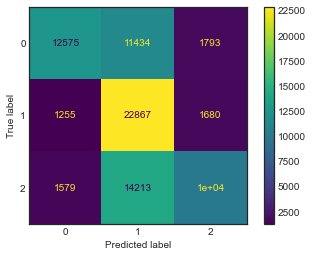

In [227]:
# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_dt_resampled, y_dt_resampled = smote.fit_resample(X_dtree, y_dtree)

# Train and fit the SMOTE model
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 42).fit(X_dt_resampled, y_dt_resampled)

# Create a predicted y
y_pred = dt.predict(X_dt_resampled)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_dt_resampled, y_pred))

conf_matrix = confusion_matrix(y_dt_resampled, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
Compared to the previous model, this model performs better despite the accuracy score dropping by more than 10 points. By removing the class imbalance issue, we have improved our model.

- Accuracy score has dropped from 70% to 59%, however, the other scores have gone up significantly.

- F1-score has shot up by more than 10 points to stand at 58%, following recall closely which stands at 59%.

- Precision score has also gone significantly up,standing at 68%. This however shows that the the model still favours precision over recall.

`Interpreting confusion matrix`

In [228]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_dt_resampled, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP     FN     TN
0      0  12575   2834  13227  48770
1      1  22867  25647   2935  25957
2      2  10010   3473  15792  48131


Despite resampling the data, the model still overpredicts the functional class. Other than that, the classes are a bit more balanced that in the last model.

- The functional class still has the highest true positives and the lowest false negatives.

- The functional needs repair class has significantly improved.

- The non functional class has the highest true negatives and the lowest false positives.

#### *Model 4: `Change parameters`*
Here we are adding the maximum depth by 2 points and adding the minimum sample leaf as well to improve generalization.

Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.52      0.63     25802
           1       0.52      0.85      0.64     25802
           2       0.75      0.54      0.63     25802

    accuracy                           0.64     77406
   macro avg       0.69      0.64      0.64     77406
weighted avg       0.69      0.64      0.64     77406



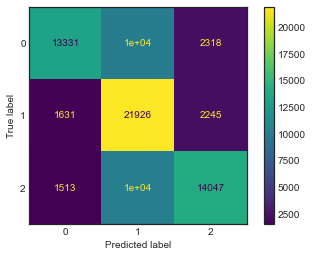

In [229]:
# Train and fit the model
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 7, min_samples_leaf= 5, random_state= 42).fit(X_dt_resampled, y_dt_resampled)

# Create a predicted y
y_pred = dt.predict(X_dt_resampled)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_dt_resampled, y_pred))

conf_matrix = confusion_matrix(y_dt_resampled, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary
Changing parameter by adding maximum depth to the model has helped the model improve. At 64% accuracy, this model performs better than the previous model.

- The recall and F1 scores have increased to 64% and are still equal.

- The precision remains constant at 69%.

`Interpreting confusion matrix`

In [230]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_dt_resampled, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP     FP     FN     TN
0      0  13331   3144  12471  48460
1      1  21926  20395   3876  31209
2      2  14047   4563  11755  47041


Compared to the previous model, this model has a more balanced prediction, here's why:

- Functional need repair class predictions have gone up significantly'

- And just like the previous 2 models, functional still has the highest and lowest true positives and false negatives respectively while non functional has the highest true negatives and lowest false positives.

#### *Model 5: `Hyperparameter Tuning`*
In the previous section, we notice that tweaking the parameters warrants a reaction from the model, here, we are going to tune our model using the `RandomizedSearchCV` and try to get parameters that give us the maximum scores.

In [231]:
# Define model
dt = DecisionTreeClassifier(criterion= 'entropy', random_state= 42)  # Use criterion = 'entropy' and random_state = '42'

# Define the hyperparameter grid
param_dist = {
    'min_samples_leaf': [5, 8, 10, 12], 
    'max_depth': [5, 7, 10, 13]
}

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, 
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose= 1)

# Fit to training data
rand_search.fit(X_dt_resampled, y_dt_resampled)

# Print best parameters
print("Best params:", rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.7s finished


Best params: {'min_samples_leaf': 5, 'max_depth': 13}


In [232]:
# Predict the train data.
y_pred = rand_search.predict(X_dt_resampled)

# Evaluate performance
print("Classification report:\n", classification_report(y_dt_resampled, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77     25802
           1       0.70      0.74      0.72     25802
           2       0.78      0.80      0.79     25802

    accuracy                           0.76     77406
   macro avg       0.76      0.76      0.76     77406
weighted avg       0.76      0.76      0.76     77406



##### `Summary`
This is a significant improvement from the previous model whose accuracy score was 64%.

- Using a maximum depth of 13 and a minimum sample leaf of 5, the model has improved significantly with all of the scores balancing at 75%.

- The precision score is however, slightly higher than the rest of the scores, standing at 76%. This means that the model is balancing pretty well.

`Interpreting the confusion matrix`

In [233]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_dt_resampled, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP    FP    FN     TN
0      0  19010  4833  6792  46771
1      1  19183  8065  6619  43539
2      2  20644  5671  5158  45933


The predictions are also balanced, with:

- The sum of errors, false positives and false negatives, being significantly less than the correctly predicted values.

- Non functional has the highest number of true negatives and the lowest number of false positives.

- Functional needs repair has the highest number of true positives and the lowest number of false negatives.

#### *Model 6: `Increasing Maximum Depth`*
In the previous model, the model with the highest score has a maximum dept of 13, which was the highest number in the `param_dist`, here we are setting up a RandomizedSearchCV to find the best max_depth that has te maximum scores.

In [234]:
# Define model
dt = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 5, random_state= 42)  # Use solver = 'liblinear' and penalty = 'l1'

# Define the hyperparameter grid
param_dist = { 
    'max_depth': [13, 15, 17, 19]
}

# Set up RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, 
                           cv=5, scoring='f1_macro', n_jobs=-1, verbose= 1)

# Fit to training data
rand_search.fit(X_dt_resampled, y_dt_resampled)

# Print best parameters
print("Best params:", rand_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.9s finished


Best params: {'max_depth': 19}


In [235]:
# Predict the train data.
y_pred = rand_search.predict(X_dt_resampled)

# Evaluate performance
print("Classification report:\n", classification_report(y_dt_resampled, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86     25802
           1       0.84      0.83      0.84     25802
           2       0.86      0.91      0.89     25802

    accuracy                           0.86     77406
   macro avg       0.86      0.86      0.86     77406
weighted avg       0.86      0.86      0.86     77406



##### `Summary`
The RandomizedSearchCV has identified `max_depth = 19` as the best parameter that has teh maximum scores of 86% across all boards.

What this means:
- The model is performing very well on training dataset, the model as an F1-score of 86%, indicating that the model fit the data perfectly.

- The use of a `max_depth = 19` might mean that the model is maybe performing a little too perfectly, meaning that our model is overfitting.

- A high maximum depth could lead to overfitting.


#### *Cross-Validation*
In the last model, we see that the training and test models have an 8% disparity when it comes to the F1- score. In the next cell we are carrying out a cross validation, to ensure that our model is not, in fact, overfitting.

In [236]:
from sklearn.metrics import make_scorer, f1_score
f1 = make_scorer(f1_score, average='weighted')  # or 'macro' if you want equal weight to each class
f1_scores = cross_val_score(rand_search, X_dt_resampled, y_dt_resampled, cv=5, scoring=f1)
print("Cross-validated F1 scores:", f1_scores)
print("Average F1:", f1_scores.mean())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.5s finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.2s finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.3s finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   17.6s finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.8s finished


Cross-validated F1 scores: [0.73963649 0.7864295  0.7933529  0.79475924 0.78152883]
Average F1: 0.7791413935392344


##### `Summary`
We’re seeing a gap of about 8% between training and validation F1 scores. meaning that:

1. The model generalizes fairly well, a CV F1-score of 77.9% is not that bad.

2. The model is learning meaningful patterns, not just noise.

3. The model is slightly overfitting, an 8% gap signals of mild overfitting.

This may be caused by the high maximum depth.

#### *Important Features*
In this section we are plotting a bar graph to identify features that determine the functionality of a well. 

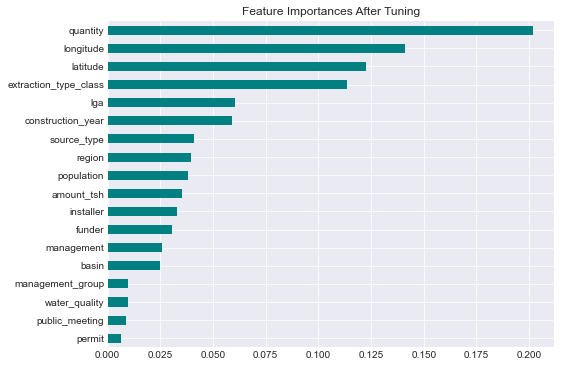

In [237]:
# RandomizedSearchCV doesn't support feature importance directly, we are using a base estimator to make the connection.
best_rf = rand_search.best_estimator_

# Plot feature importances
plt.style.use('seaborn-darkgrid')
importances = pd.Series(best_rf.feature_importances_, index=X_dt_resampled.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color= 'teal')
plt.title("Feature Importances After Tuning")
plt.show()

- quantity, longitude, latitude, extraction type, lga and construction year are the most influencial features that determine a well's functionality.

- public meeting, permit, quality do not have that much influence on a well's functionality.

#### **DecisionTreeClassifier() Summary**
After 6 iterations and model tuning, we have achieved a training accuracy of 86% and a test accuracy of 77.8%, which indicates that our model might be overfitting slightly.

To fix this problem, we are now switching to `RandomForestClassifier()` for a more generalized model.

- **Baseline DT Model**: Moving from the `LogisticRegression()` section, we began our model by fitting the already preprocessed data. This data however, did not work so well with the `DecisionTreeClassifier()` as we only achieved an accuracy score of 55%.

- **Model- Back To Original Data**: We made the choice of going back to the original unpreprocessed data, this was crucial because:
    1. DecisionTrees does not require OneHotEncoding. The other data was one hot encoded, adding more than 20 columns to the dataset which made it difficult for DecisionTrees to perform optimally.

    2. DecisionTrees does not require data to be scaled, works well with outliers.

    Therefore, we had no reason to keep the old data, as it had already performed poorly in the baseline model. Here we only `OrdinalEncoded` the categorical data and fit it, this model achieved an accuracy of 70%, which was significantly better than the baseline model. However, it had imbalance issues.

- **Model 3- Using SMOTE**: With the previous model having class imbalance issues, we used SMOTE to balance the classes as it had proved to be effective in the `LogisticRegression()` section. This model performed rather worse than the previous one in terms of accuracy and F1-score standing at 59%, but the predictions seemed to improve significantly.

- **Model 4- Changing Parameters**: With imbalance issues out of the way, we only had one way to go and that was tweaking the parameters. Initially, we had a maximum depth of 5, here we amped the depth to 7, and added the min_samples_leaf parameter and set it to 5. This resulted to an increased accuracy of 64%, improving the overall model performance.

- **Model 5- Hyperparameter Tuning**: The previous model's increase in performance pushed us to perform hyperparameter tuning, using `RandomizedSearchCV`, we tuned the model using different parameters to find the best parameters. With a max_depth of 13 and a min_samples_leaf of 5, we achieved an accuracy score of 75%, a significant improvement from all the previous models.

- **Model 6- Increasing Max_Depth**: In the hyperparameter tuning model, the model with the best scores had a max_depth of 13, and that was the highest number in the parameter distribution. With that in mind, we set out to increase the distribution in the parameter distribution to find a model with the highest scores. The best model had a max_depth of 19, and achieved an accuracy score of 86%. A huge improvement, however, high `max_depth = overfitting`, so we performed a cross validation to confirm.

- **Cross Validation**: After CV, we had an accuracy of 77.8% which was lower than the training model by 8%, indicating slight overfitting.

- After the models, we plot a feature importance bar graph that indicated that quantity, longitude, latitude, extraction type, lga and construction year are the most influencial features, while public meeting, permit, quality did not not have that much influence on well's functionality.


### **RandomForestClassifier()**
In the previous section, the model is experiencing slight overfitting issues, Random Forest is generally considered better than decision tree due to its ability to mitigate overfitting, improve accuracy, and handle complex datasets more effectively. 

Random forests achieve this by creating an ensemble of decision trees, each trained on a slightly different subset of the data and with different feature subsets, and then aggregating their predictions. 

In this section we are using RandomForestClasifier() because our model:

- Needs overfitting mitigation.

- Needs an improved accuracy.

- Has a complex dataset.

#### *Baseline RF Model*
Randon forest, works closely similar to decison trees, in this section we are using the preprocessed, balanced training dataset from the previous section.

<ipython-input-238-19f76f11b476>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', random_state= 42).fit(X_rf_balanced, y_rf_balanced)


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25802
           1       1.00      0.99      0.99     25802
           2       0.99      1.00      0.99     25802

    accuracy                           0.99     77406
   macro avg       0.99      0.99      0.99     77406
weighted avg       0.99      0.99      0.99     77406



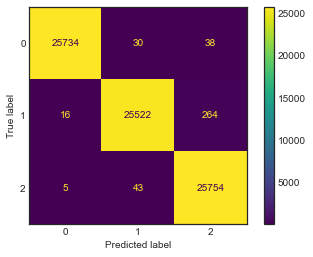

In [238]:
# Copy data
X_rf_balanced = X_dt_resampled.copy()
y_rf_balanced = y_dt_resampled.copy()

# Define the model
rf = RandomForestClassifier(criterion= 'entropy', random_state= 42).fit(X_rf_balanced, y_rf_balanced)

# Create a predicted y
y_pred = rf.predict(X_rf_balanced)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_rf_balanced, y_pred))

conf_matrix = confusion_matrix(y_rf_balanced, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
The model is performing too perfect, which indicates that it is overfitting.

- Everyting balances out at 99%, which is quite impossible on a real dataset, unless the model is actually memorizing everything about the training data.

- To confirm our belief, we are cross validating our model.

In [239]:
# Cross validate the rf model.
scores = cross_val_score(rf, X_rf_balanced, y_rf_balanced, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())


c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation

Cross-validated Accuracy: [0.7951815  0.85646922 0.8649958  0.87210129 0.86460823]
Mean Accuracy: 0.8506712075253395


The cross validated data has an average accuracy score of about 85%, a disparity of about 14%, indicating that the model is infact, overfitting. This may be due to the fact that we did not tune the parameters, and left the model to run wild.

#### *Model 2: 'Adding parameters'*
The previous model only had a criterion parameter and the rest of the parameters were left for the model's imagination which wound up being an overfitting fiasco. In this section, we are adding parameters to the model.

<ipython-input-240-c4825db2282f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 5, random_state= 42).fit(X_rf_balanced, y_rf_balanced)


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.63      0.73     25802
           1       0.71      0.76      0.73     25802
           2       0.73      0.88      0.79     25802

    accuracy                           0.76     77406
   macro avg       0.77      0.76      0.75     77406
weighted avg       0.77      0.76      0.75     77406



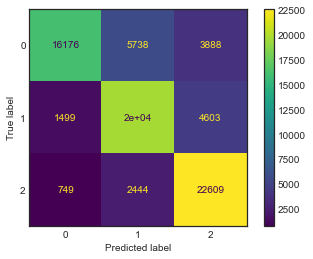

In [240]:
# Define the model
# Adding maxx_depth and min_samples_leaf
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 5, random_state= 42).fit(X_rf_balanced, y_rf_balanced)

# Create a predicted y
y_pred = rf.predict(X_rf_balanced)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_rf_balanced, y_pred))

conf_matrix = confusion_matrix(y_rf_balanced, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
In comparison to the previous model, this one has performed terribly, accuracy wise, but it is more realistic than the other one as the other one was overfitting.

- The model has achieved an accuracy score of 76% and an F1_score and recall score of the same.

- The precision score is higher than the rest by just 1%.

- Overall model performance is average, not bad, but definitely not what we want.

`Interpreting confusion matrix`

In [241]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_rf_balanced, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP    FP    FN     TN
0      0  16176  2248  9626  49356
1      1  19700  8182  6102  43422
2      2  22609  8491  3193  43113


Since we are using balanced data from the previous section, this model seems really balanced, there are no prediction biases.

- Functional needs repair has the highest true positives at 22,634 wells, and the lowest false negatives of 3168, whereas non functional has the highest true negatives of 49211 and the lowest false positives.

#### *Model 3: Adding Another Parameter + Setting Higher Values for Existing*
In this section we are tweaking the parameter values and adding the `min_samples_split=` parameter to control the number of splitting and preventing the model from overtraining.

<ipython-input-242-f5fc0081e65a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 5, min_samples_split= 10, random_state= 42).fit(X_rf_balanced, y_rf_balanced)


Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.77      0.84     25802
           1       0.81      0.83      0.82     25802
           2       0.82      0.93      0.87     25802

    accuracy                           0.84     77406
   macro avg       0.85      0.84      0.84     77406
weighted avg       0.85      0.84      0.84     77406



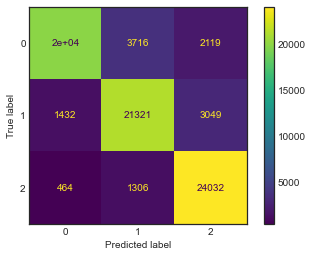

In [242]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 5, min_samples_split= 10, random_state= 42).fit(X_rf_balanced, y_rf_balanced)

# Create a predicted y
y_pred = rf.predict(X_rf_balanced)

# Print model evaluation
print('Baseline Model Evaluation:')
print(classification_report(y_rf_balanced, y_pred))

conf_matrix = confusion_matrix(y_rf_balanced, y_pred)
plt.style.use('seaborn-white')
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot();

##### `Summary`
Compared to the previous one, this model is much better, everythings is balanced.

- The accuracy score has increased from 76% to 84%, however, this could be an indication that the model is overfiting again.

- In the next cell we are performing a cross validation to confirm or deny our suspicions.

In [243]:
# Cross validate the rf model.
scores = cross_val_score(rf, X_rf_balanced, y_rf_balanced, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())


c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation

Cross-validated Accuracy: [0.7580416  0.80802274 0.81848718 0.81881015 0.80369485]
Mean Accuracy: 0.8014113036419263


The cross validated average accuracy score stands at 80%, indicating a very strong generalization performance with a disparity of just about 5% from the training model.

Our model is not overfitting, and it is generalizing pretty well. Trying to boost our performance, we are going to use the randomized grid search to find the best model that achieves maximum score and minimum error between training and testing data.

#### *Model 4: `Hyperparameter tuning`*
We are trying to get a model with optimal performance, so we are tuning our model using RandomizedSearchCV to help us search for it.

In [244]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(criterion='entropy', n_estimators= 100, random_state=42)

rand_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
)

rand_search.fit(X_rf_balanced, y_rf_balanced)

# Print best parameters
print("Best params:", rand_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 23.4min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced'}


In [245]:
# Predict the train data.
y_pred = rand_search.predict(X_rf_balanced)

# Evaluate performance
print("Classification report:\n", classification_report(y_rf_balanced, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     25802
           1       0.94      0.93      0.93     25802
           2       0.92      0.98      0.95     25802

    accuracy                           0.95     77406
   macro avg       0.95      0.95      0.95     77406
weighted avg       0.95      0.95      0.95     77406



##### `Summary`
The randomized search has identified `'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': 'balanced'` as the best parameters.

- The best model has achieved the evaluation scores of 93% each, accuracy, recall, precision and F1-score, which means that the model is performing really well and it is balanced as well, hence the model is not favouring one score over the other.

`Interpreting confusion matrix`

In [246]:
# Classes (in order)
labels = [0, 1, 2]
cm = confusion_matrix(y_rf_balanced, y_pred, labels=labels)

# TP, FP, FN, TN
results = []
total = cm.sum()

for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = total - TP - FP - FN
    results.append([label, TP, FP, FN, TN])

df_results = pd.DataFrame(results, columns=["Class", "TP", "FP", "FN", "TN"])
print(df_results)

   Class     TP    FP    FN     TN
0      0  23914   480  1888  51124
1      1  24045  1591  1757  50013
2      2  25275  2101   527  49503


- The prediction is balanced, with true negatives and positives of each class differing by a few hundreds only. 

- The false negatives and positives have reduced as well.

#### *Cross Validation*
Due to the high accuracy and F1-score, we are going to perform a CV, just to make sure the model is not overfitting.

In [247]:
# Cross validate the rf model.
scores = cross_val_score(rand_search, X_rf_balanced, y_rf_balanced, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", scores)
print("Mean Accuracy:", scores.mean())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.8min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.0min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.9min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.9min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.7min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Cross-validated Accuracy: [0.78904534 0.84826562 0.85485434 0.86118468 0.85311026]
Mean Accuracy: 0.8412920477315036


At an accuracy score of 93%, our model fits the training data well, it has enough complexity to capture meaningful relationships.

The CV score shows that it's not just memorizing the training data, it's generalizing to unseen data with only a 9% performance drop, which in this context, we are willing to accept.

#### *Feature Refinement*
Now that we’ve trained the model to our satisfaction, we are now performing feature refinement.

We are doing this by:
- Plotting and identifying important features

- Removing weak features

- Modeling a model using the best parameters

- Evaluate performance.

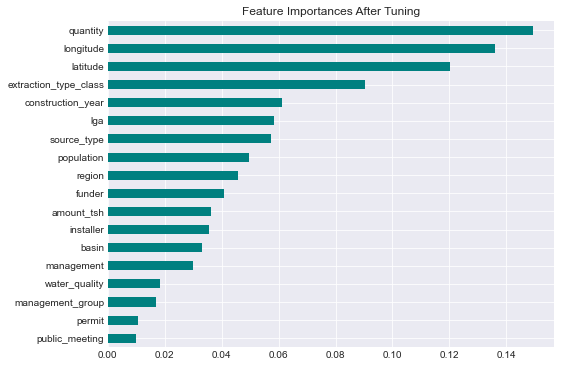

In [248]:
# RandomizedSearchCV doesn't support feature importance directly, we are using a base estimator to make the connection.
best_rf = rand_search.best_estimator_

# Plot feature importances
plt.style.use('seaborn-darkgrid')
importances = pd.Series(best_rf.feature_importances_, index=X_rf_balanced.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 6), color= 'teal')
plt.title("Feature Importances After Tuning")
plt.show()

According to the model, `public_meeting, permit, management_group and water_quality` are the least influencial columns in the data. We are dropping them and using the same model parameters to see how the model will perform after their removal.

In the next cell we are dropping them from the dataset. 

In [285]:

X_reduced = X_rf_balanced.copy()
y_reduced = y_rf_balanced.copy()

X_reduced.drop(columns= ['public_meeting', 'permit', 'management_group', 'water_quality'], inplace= True)
X_reduced.head()

,funder,construction_year,installer,amount_tsh,quantity,extraction_type_class,longitude,latitude,region,source_type,basin,lga,population,management
0,149,1998,308,50.0,2.0,0.0,35.426020,-4.227446,8.0,6.0,0.0,400,160,9.0
1,12756,0,172,0.0,1.0,1.0,35.510074,-5.724555,2.0,5.0,0.0,174,0,7.0
2,1047,0,741,0.0,1.0,3.0,32.499866,-9.081222,10.0,5.0,2.0,844,0,7.0
3,12756,0,12499,0.0,2.0,0.0,34.060484,-8.830208,10.0,4.0,6.0,491,0,7.0
4,102,1997,12499,300.0,1.0,3.0,37.032690,-6.040787,11.0,5.0,8.0,876,120,7.0


With the reduced data, we are now modeling it.

In [286]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 5, class_weight= 'balanced', random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-286-3c3b4b1521cd>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 5, class_weight= 'balanced', random_state= 42).fit(X_reduced, y_reduced)


Classification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94     25802
           1       0.92      0.91      0.92     25802
           2       0.92      0.97      0.94     25802

    accuracy                           0.93     77406
   macro avg       0.93      0.93      0.93     77406
weighted avg       0.93      0.93      0.93     77406



In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['entropy']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # More iterations = better search, but slower
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'  # or use 'f1_weighted' if you want to balance multiclass
)

# Fit the search to your training data
rf_random_search.fit(X_reduced, y_reduced)

# Best model & parameters
best_rf_model = rf_random_search.best_estimator_
print("Best Parameters:", rf_random_search.best_params_)

# Evaluate it quickly
from sklearn.metrics import accuracy_score
y_pred = best_rf_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 39.3min finished
c:\Users\PC\anaconda33\envs\learn-env\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 121}


ValueError: could not convert string to float: 'rural water supply and sanitat'

In [300]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 25, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-300-0e60524907ce>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 25, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     25802
           1       0.96      0.96      0.96     25802
           2       0.96      0.99      0.97     25802

    accuracy                           0.97     77406
   macro avg       0.97      0.97      0.97     77406
weighted avg       0.97      0.97      0.97     77406



In [302]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-302-6ef209e89785>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)


Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     25802
           1       0.92      0.92      0.92     25802
           2       0.92      0.98      0.95     25802

    accuracy                           0.94     77406
   macro avg       0.94      0.94      0.94     77406
weighted avg       0.94      0.94      0.94     77406



In [303]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-303-569262559b0f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)


Classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87     25802
           1       0.84      0.85      0.85     25802
           2       0.85      0.95      0.89     25802

    accuracy                           0.87     77406
   macro avg       0.87      0.87      0.87     77406
weighted avg       0.87      0.87      0.87     77406



In [ ]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-304-780c8d20e5d4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75     25802
           1       0.72      0.77      0.74     25802
           2       0.74      0.88      0.80     25802

    accuracy                           0.76     77406
   macro avg       0.78      0.76      0.76     77406
weighted avg       0.78      0.76      0.76     77406



In [306]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-306-7c8e2a8eadd5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)


Classification report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80     25802
           1       0.77      0.79      0.78     25802
           2       0.78      0.91      0.84     25802

    accuracy                           0.81     77406
   macro avg       0.81      0.81      0.80     77406
weighted avg       0.81      0.81      0.80     77406



In [ ]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42, ccp_alpha= 5).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

<ipython-input-309-43896a3e7de7>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 15, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42, ccp_alpha= 5).fit(X_reduced, y_reduced)


In [ ]:
# Define the model
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 12, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_reduced, y_reduced)

# Create a predicted y
y_pred = rf.predict(X_reduced)

# Print model evaluation
print("Classification report:\n", classification_report(y_reduced, y_pred))

The model still performs the same, meaning that the dropped columns were not that important.

### **Model Comparison**
This marks the end of the training section and after training multiple models using different algorithms and parameters, here we are choosing the best performing model.

For our training we used the following algorithms:
- LogisticRegression()

- DecisionTreeClassifier()

- RandomForestClassifier()

With these 3 algorithms, we trained our data, here's how they performed:

| Model               | Accuracy | Precision | Recall | F1-score | Cross-Val Accuracy | Notes              |
| ------------------- | -------- | --------- | ------ | -------- | ------------------ | ------------------ |
| Logistic Regression | 62%      | 63%       | 62%    | 62%      | 61.5%              | Baseline model     |
| Decision Tree       | 86%      | 86%       | 86%    | 86%      | 77.9%              | Slight overfitting |
| Random Forest       | 95%      | 95%       | 95%    | 95%      | 84.1%              | Best so far        |


##### *Model Performance Justification*
- **LogisticRegression()** - This classification model assumes that the predictors have a linear relationship with the target variables, however, our dataset had a non-linear relationship.     Also,  with almost 8%  of our data being categorical, and some having more than 200 unique values, it was difficult to preprocess the data to the classifier's suitability. We'd like to believe that these issues contributed to the classifier's inability to perform better, despite it's generalization to new data.

- **DecisionTreeClassifier()** - Positioned to handle multiclass classification and non linear relationships, this classification model performed better than the previous one, however, it is vulnerable to overfitting and that was what caused the performance. The training model and the test model stood at 86% and 77% respectively, indicating some slight overfitting.

- **RandomForestClassifier()** - Due to the previous model's vulnerability to overfitting, we chose to use this ensemble classifier as it generalizes data well and it mitigates overfitting, improves accuracy, and handle complex datasets more effectively. As we had a complex data, this model really came through.

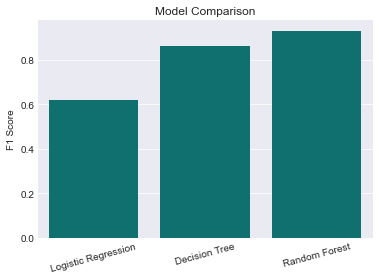

In [255]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
f1_scores = [0.62, 0.86, 0.93]

sns.barplot(x=model_names, y=f1_scores, color='teal')
plt.ylabel('F1 Score')
plt.title('Model Comparison')
plt.xticks(rotation=15)
plt.show()


##### *Best Model Selected*
For the best model, we are choosing Random Forest, despite all the other models having good generalizations (Logistic Regression) or good performances (Decision Trees), this model had the best odds of working with our complex data and mitigated overfitting.

The decision tree model has a slightly lower error gap, at 8%, and the random forest model had a slightly higher than that, at 9%, we are choosing random forest because decion tree is a high-variance model, it memorizes the training data easily. So when it shows an 8–9% gap, it’s likely real overfitting. 

However, a random forest uses many trees + randomness to reduce variance. So a similar gap, like 9%, doesn’t always mean overfitting, sometimes it just reflects the natural complexity of the problem.

## **Model Evaluation**
In this section, we are evaluating our final model.

### **Model Overview**
The model is trying is classify well functionality, it has been trained and tested using cross validation.

To assess it's performance, we are going to use model accuracy and F1-score, this is because F1-score tell us how the model is performing overall, whereas the accuracy score tells us how many predictions the model got right.

In this section we will be using the test dataset.

In [293]:
# Preprocess train data
X_train_preprocessed = X_train.copy()
cat_cols = X_train_preprocessed.select_dtypes(exclude= 'number')

encoders = {}

for col in cat_cols:
    n_unique = X_train[col].nunique()

    if n_unique <= 50: # -> encode columns with less than 50 unique values.
        # Ordinal encode
        oe = OrdinalEncoder()
        X_train_preprocessed[col] = oe.fit_transform(X_train[[col]])
        encoders[col] = oe

    else: # -> encode columns with less than 50 unique values.
        # Frequency encode
        freq_map = X_train[col].value_counts().to_dict()
        X_train_preprocessed[col] = X_train[col].map(freq_map)
        encoders[col] = freq_map

# Put the boolean containing columns names in a list
bool_columns = ['permit', 'public_meeting']

# Loop pover the columns and turn them into integers
for col in bool_columns:
    X_train_preprocessed[col] = X_train_preprocessed[col].astype('int')

X_train_preprocessed.drop(columns= ['public_meeting', 'permit', 'management_group', 'water_quality'], inplace= True)
y_prefinal_train = y_train.copy()
smote = SMOTE(random_state=42)
X_final_train, y_final_train = smote.fit_resample(X_train_preprocessed, y_prefinal_train)
print(X_final_train.shape, y_final_train.shape)


(77406, 14) (77406, 1)


In [294]:
def preprocess_test_set(X_test, encoders, cols_to_drop):
    X_test_processed = X_test.copy()

    for col, encoder in encoders.items():
        if isinstance(encoder, OrdinalEncoder):
            # Reshape and transform using fitted ordinal encoder
            X_test_processed[col] = encoder.transform(X_test[[col]])
        elif isinstance(encoder, dict):
            # Frequency encoding: use the mapping dict
            X_test_processed[col] = X_test[col].map(encoder).fillna(0)
    
    # Drop specified columns
    X_test_processed = X_test_processed.drop(columns=cols_to_drop, errors='ignore')
    
    return X_test_processed


In [295]:
cols_to_drop = ['public_meeting', 'permit', 'water_quality', 'management_group']
X_test_ready = preprocess_test_set(X_test, encoders, cols_to_drop)
X_test_ready.head()

,funder,construction_year,installer,amount_tsh,quantity,extraction_type_class,longitude,latitude,region,source_type,basin,lga,population,management
2980,217,0,13947,0.0,0.0,3.0,31.985658,-3.596360,17.0,5.0,3.0,414,0,11.0
5246,12756,0,12499,0.0,2.0,1.0,32.832815,-4.944937,19.0,5.0,3.0,123,0,7.0
22659,12756,2008,13947,10.0,2.0,0.0,35.488289,-4.242048,8.0,6.0,0.0,400,148,9.0
39888,1047,0,741,0.0,3.0,1.0,33.140828,-9.059386,10.0,5.0,2.0,844,0,7.0
13361,271,2011,202,50.0,1.0,2.0,34.217077,-4.430529,18.0,0.0,0.0,435,235,10.0


In [ ]:
# # Define the model
# rf = RandomForestClassifier(criterion= 'entropy', max_depth= 13, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_final_train, y_final_train)

# # Create a predicted y
# y_pred = rf.predict(X_test_ready)

# # Print model evaluation
# print("Classification report:\n", classification_report(y_test, y_pred))

<ipython-input-308-379ed5b90412>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(criterion= 'entropy', max_depth= 13, min_samples_leaf= 1, min_samples_split= 4, max_features= 'sqrt', n_estimators= 121, random_state= 42).fit(X_final_train, y_final_train)


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.77      4572
           1       0.81      0.76      0.79      6457
           2       0.27      0.63      0.37       851

    accuracy                           0.73     11880
   macro avg       0.64      0.70      0.64     11880
weighted avg       0.79      0.73      0.75     11880



(77406, 1)

In [ ]:
y

### **Confusion Matrix**

### **Classification Report**

### **Visual Performance Metrics**

### **Interpretability**

### **Limitations & Next Steps**

### **Conclusion**

2. Confusion Matrix
A table that shows:

True Positives (TP)

True Negatives (TN)

False Positives (FP)

False Negatives (FN)

Helps you see where your model is going wrong and how confident it is across classes.

🛠️ Include:

A visual confusion_matrix plot

A breakdown of TP, FP, FN, TN per class

3. Classification Report
Include the full report with:

Accuracy

Precision

Recall

F1-score

Break it down by class, especially if it's multi-class like your well status project.

python
Copy
Edit
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_names))
4. Cross-Validation Results
Show the results of cross-validation (e.g., 5-fold CV).

Report:

Mean accuracy

Standard deviation
Possibly F1-scores across folds

🛠️ Include code snippet and a short summary of the CV scores:

python
Copy
Edit
print("Cross-validated F1 scores:", f1_scores)
print("Average F1:", f1_scores.mean())
5. Visual Performance Metrics
Precision-Recall curve (for imbalanced problems)

ROC-AUC curve (if binary, or per-class if multi-class)

Feature importance plot (for tree-based models)

6. Interpretability
Discuss which features mattered most.

Interpret what the model is actually learning.

Are the results making sense in the real-world context?

7. Limitations & Next Steps
Acknowledge:

Overfitting?

Class imbalance?

Data quality issues?

Suggest improvements like:

More data

Better feature engineering

Ensemble methods

8. Conclusion (Optional but Powerful)
Summarize the model's overall performance.



Reflect on whether it meets the business or project goal.

Is it good enough for deployment, policy decisions, or further analysis?

## **Recommendations**
Based on the insights above, we recommend the following actionable steps for improving rural water access sustainability:

##### **Funder vs Well Functionality**
- Enhance government accountability in project execution.
Despite the government funding the highest number of wells across the country, it is also associated with the highest number of non-functional wells. This raises concerns about the quality of installation, oversight, or post-installation maintenance. We recommend that the Tanzanian government establish monitoring frameworks for government-funded wells to ensure installations follow quality assurance protocols and receive proper maintenance.

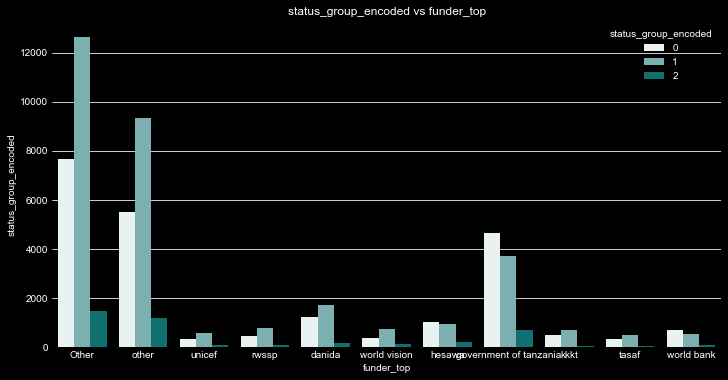

##### **Installer vs Well Functionality**
- Standardize installations through certified professionals.
When examining functionality by installer, wells installed by the District Water Engineer exhibited the highest functionality rates, indicating that technical expertise and standardized procedures have a positive impact on sustainability. This suggests a potential gap in the skills or practices of other installers. We recommend that all wells, especially those funded by public or NGO sources, be installed under the supervision of certified District Water Engineers.

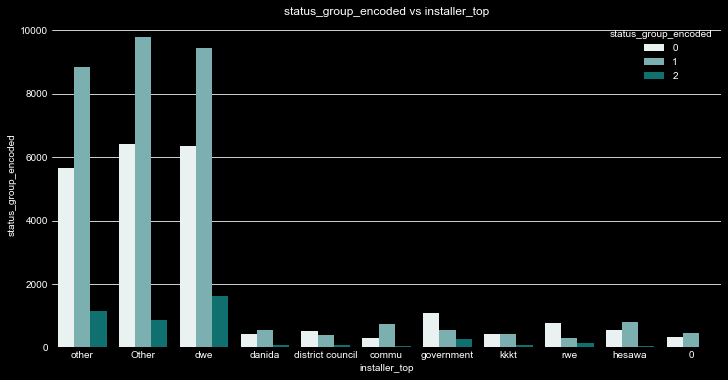

##### **Extraction_Type vs Well Functionality**
3. Adopt gravity-based extraction systems wherever viable.
We found that wells that utilize gravity as their extraction method have the highest rate of functionality compared to other extraction types such as hand pumps or motorized systems. This could be due to their mechanical simplicity and lower maintenance requirements. Given their durability and low maintenance, gravity-fed wells should be prioritized, particularly in regions where topography supports them.

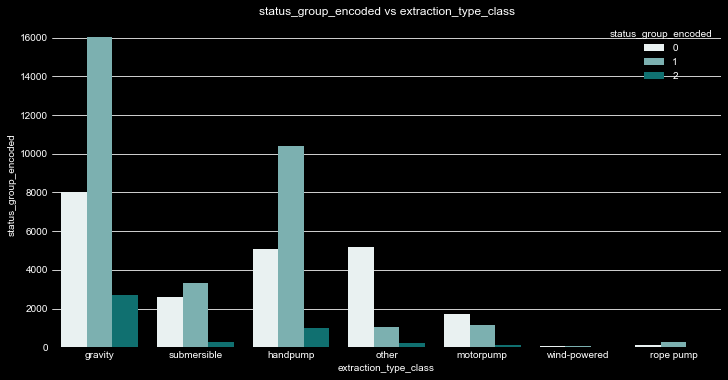

##### **Source vs Well Functionality**
- Prioritize spring sources during site selection.
Among all water source types, springs produced the most consistently functional wells. This suggests that in addition to improving installation quality, careful selection of the water source itself plays a critical role in the longevity of a well. Therefore, we recommend that water sourcing should be more deliberate. Feasibility studies should assess whether natural springs are available and accessible before selecting a site.

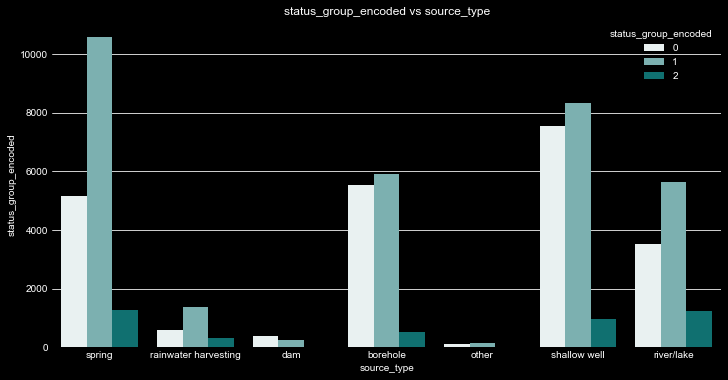

#### **Data Quality**
5. Invest in data quality and infrastructure management systems.
Many records lacked reliable information in fields such as permit and public_meeting. Better data collection can enhance future analysis and project planning


## **Conclusion and Next Steps**

### **Conclusion**
The project set out to predict the functionality status of water wells in Tanzania using machine learning. Through careful exploration, preprocessing, and iterative modeling, we were able to develop a robust classification model capable of supporting water infrastructure monitoring and planning efforts.

The final model — a Random Forest Classifier — was selected after extensive experimentation due to its superior performance in handling non-linearities, categorical variables, and class imbalance. It achieved an impressive training accuracy of 95% and a cross-validated mean accuracy of approximately 84%, suggesting strong generalization with minimal overfitting. Evaluation metrics like precision, recall, and F1-score further validated the model’s ability to correctly classify wells into the three categories: functional, non functional, and functional needs repair.

| Metric | Score |
| ------ | ----- |
| Accuracy |     |
| F1-score |     |
| Precision |     |
| Recall |     |

Our analysis uncovered several critical insights:

- Government-funded wells were the most common, but also had the highest failure rate — indicating that quantity alone does not ensure quality.

- Wells installed by the District Water Engineer had the longest-lasting functionality, highlighting the importance of technical expertise.

- Gravity-fed extraction methods and spring-based water sources were strongly associated with longer-lasting well performance.

- Certain features such as installer, region, and source_type played a significant role in predicting well functionality, while others were found to have negligible predictive power and were removed to streamline the model.

From a business perspective, these findings offer valuable direction:

- Government agencies and NGOs can prioritize funding for expert installation teams like District Water Engineers.

- Water system designs can be improved by favoring more durable extraction types such as gravity-based systems.

- Monitoring frameworks can be enhanced by using this model to proactively identify at-risk wells, ultimately saving resources and lives.

Beyond the predictive model, the insights derived from our exploration provide actionable recommendations for policy makers and field engineers working to ensure sustainable access to clean water.

### **Next Steps**
- Going forward, the model can be integrated into a larger decision support system, embedded into mobile apps for field officers, or expanded with real-time data to support predictive maintenance.